In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import os
import glob

# directory containing the parquet files
file_path = '/content/drive/MyDrive/capstone'

# Getting list of all parquet files in the directory
parquet_files = glob.glob(os.path.join(file_path, '*.parquet'))

df_list = []

for file in parquet_files:
    temp_df = pd.read_parquet(file)

    if 'Airport_fee' in temp_df.columns:
        print(f"Unique values in 'Airport_fee' before renaming in {file}: {temp_df['Airport_fee'].unique()}")
        temp_df.rename(columns={'Airport_fee': 'airport_fee'}, inplace=True)

    if 'airport_fee' in temp_df.columns:
        print(f"Unique values in 'airport_fee' before merging in {file}: {temp_df['airport_fee'].unique()}")

    df_list.append(temp_df)

merged_df = pd.concat(df_list, ignore_index=True)

print(f"Unique values in 'airport_fee' after merging: {merged_df['airport_fee'].unique()}")


Unique values in 'Airport_fee' before renaming in /content/drive/MyDrive/capstone/yellow_tripdata_2024-01.parquet: [ 0.    1.75 -1.75   nan]
Unique values in 'airport_fee' before merging in /content/drive/MyDrive/capstone/yellow_tripdata_2024-01.parquet: [ 0.    1.75 -1.75   nan]
Unique values in 'airport_fee' before merging in /content/drive/MyDrive/capstone/yellow_tripdata_2023-01.parquet: [ 0.    1.25 -1.25   nan]
Unique values in 'Airport_fee' before renaming in /content/drive/MyDrive/capstone/yellow_tripdata_2023-02.parquet: [ 0.    1.25 -1.25   nan]
Unique values in 'airport_fee' before merging in /content/drive/MyDrive/capstone/yellow_tripdata_2023-02.parquet: [ 0.    1.25 -1.25   nan]
Unique values in 'Airport_fee' before renaming in /content/drive/MyDrive/capstone/yellow_tripdata_2023-03.parquet: [ 0.    1.25 -1.25   nan]
Unique values in 'airport_fee' before merging in /content/drive/MyDrive/capstone/yellow_tripdata_2023-03.parquet: [ 0.    1.25 -1.25   nan]
Unique values in 

In [ ]:

# Create a column for the hour of the trip
merged_df['hour'] = merged_df['tpep_pickup_datetime'].dt.hour

# Downsample within each hour of the day
df_sampled_by_hour = merged_df.groupby('hour').sample(frac=0.1, random_state=42)


In [ ]:
df_sampled_by_hour.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,hour
31795150,2,2023-10-08 00:41:58,2023-10-08 01:06:36,1.0,10.85,1.0,N,70,239,1,43.6,6.00,0.5,12.11,6.94,1.0,74.40,2.5,1.75,0
48062712,2,2024-04-03 00:01:42,2024-04-03 00:12:58,1.0,2.60,1.0,N,79,140,1,13.5,1.00,0.5,5.55,0.00,1.0,24.05,2.5,0.00,0
17948484,2,2023-05-21 00:18:22,2023-05-21 00:30:13,1.0,1.36,1.0,N,114,79,1,12.1,1.00,0.5,3.42,0.00,1.0,20.52,2.5,0.00,0
25197224,1,2023-07-31 00:27:19,2023-07-31 01:01:12,2.0,20.20,1.0,N,132,40,1,76.5,2.75,0.5,16.15,0.00,1.0,96.90,0.0,1.75,0
28430810,2,2023-09-04 00:40:45,2023-09-04 00:45:25,2.0,1.62,1.0,N,79,233,1,8.6,1.00,0.5,1.00,0.00,1.0,14.60,2.5,0.00,0


In [ ]:
df_sampled_by_hour.shape

(5864233, 20)

In [ ]:
merged_df1=df_sampled_by_hour.copy(deep=True)

In [ ]:
merged_df=df_sampled_by_hour.copy(deep=True)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

print(merged_df.shape)
print(merged_df.head())
print(merged_df.columns)

(5864233, 20)
          VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
31795150         2  2023-10-08 00:41:58   2023-10-08 01:06:36   
48062712         2  2024-04-03 00:01:42   2024-04-03 00:12:58   
17948484         2  2023-05-21 00:18:22   2023-05-21 00:30:13   
25197224         1  2023-07-31 00:27:19   2023-07-31 01:01:12   
28430810         2  2023-09-04 00:40:45   2023-09-04 00:45:25   

          passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
31795150              1.0          10.85         1.0                  N   
48062712              1.0           2.60         1.0                  N   
17948484              1.0           1.36         1.0                  N   
25197224              2.0          20.20         1.0                  N   
28430810              2.0           1.62         1.0                  N   

          PULocationID  DOLocationID  payment_type  fare_amount  extra  \
31795150            70           239             1         43.6   6.00

In [ ]:
merged_df.nunique(axis=0)
merged_df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,hour
count,5864233.000000,5864233.000000,5864233.000000,5536942.000000,5864233.000000,5536942.000000,5864233.000000,5864233.000000,5864233.000000,5864233.000000,5864233.000000,5864233.000000,5864233.000000,5864233.000000,5864233.000000,5864233.000000,5536942.000000,5536942.000000,5864233.000000
mean,1.745784,f,f,1.358218,4.177522,1.834883,165.079628,163.925584,1.156230,19.280491,1.505760,0.484552,3.434318,0.574352,0.976472,28.085125,2.259991,0.141049,14.283104
min,1.000000,f,f,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-980.000000,-7.500000,-0.500000,-82.300000,-84.300000,-1.000000,-983.500000,-2.500000,-1.750000,0.000000
25%,1.000000,f,f,1.000000,1.030000,1.000000,132.000000,113.000000,1.000000,9.300000,0.000000,0.500000,0.000000,0.000000,1.000000,15.800000,2.500000,0.000000,11.000000
50%,2.000000,f,f,1.000000,1.780000,1.000000,162.000000,162.000000,1.000000,13.500000,1.000000,0.500000,2.740000,0.000000,1.000000,21.000000,2.500000,0.000000,15.000000
75%,2.000000,f,f,1.000000,3.380000,1.000000,234.000000,234.000000,1.000000,21.900000,2.500000,0.500000,4.340000,0.000000,1.000000,30.450000,2.500000,0.000000,19.000000
max,6.000000,f,f,9.000000,258928.150000,99.000000,265.000000,265.000000,4.000000,19152.900000,10002.500000,53.160000,604.090000,117.670000,1.000000,29156.900000,2.500000,1.750000,23.000000
std,0.439194,nan,nan,0.872491,247.940501,8.585408,64.120871,69.740931,0.584621,20.898690,4.519106,0.116946,4.056598,2.187439,0.210873,26.796793,0.811045,0.476871,5.824475


In [ ]:
print("Data Types:")
print(merged_df.dtypes)

print("\nMissing Values:")
print(merged_df.isnull().sum())


Data Types:
VendorID                          int64
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
hour                              int32
dtype: object

Missing Values:
VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          327291
trip_distance                

In [ ]:
# changing missing passenger_count with the mode
passenger_mode = merged_df['passenger_count'].mode()[0]
merged_df['passenger_count'].fillna(passenger_mode, inplace=True)

# changing missing RatecodeID with the mode
ratecode_mode = merged_df['RatecodeID'].mode()[0]
merged_df['RatecodeID'].fillna(ratecode_mode, inplace=True)

# changing missing store_and_fwd_flag with the mode
store_and_fwd_mode = merged_df['store_and_fwd_flag'].mode()[0]
merged_df['store_and_fwd_flag'].fillna(store_and_fwd_mode, inplace=True)

# changing missing congestion_surcharge with 0
merged_df['congestion_surcharge'].fillna(0, inplace=True)

# changing missing airport_fee with 0
merged_df['airport_fee'].fillna(0, inplace=True)


<ipython-input-250-0264fa150bdd>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['passenger_count'].fillna(passenger_mode, inplace=True)
<ipython-input-250-0264fa150bdd>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [ ]:
# Verifying that all missing values have been handled
print("\nMissing Values After changing:")
print(merged_df.isnull().sum())



Missing Values After changing:
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
hour                     0
dtype: int64


In [ ]:
print("\nDescriptive Statistics After Handling Missing Values:")

numerical_cols = merged_df.select_dtypes(include=['int64', 'float64']).columns
datetime_cols = ['tpep_pickup_datetime', 'tpep_dropoff_datetime']

desc_stats_num = merged_df[numerical_cols].describe()

formatted_desc_stats_num = desc_stats_num.round(2)

datetime_stats = merged_df[datetime_cols].agg(['min', 'max'])

print("\nDescriptive Statistics for Numerical Columns:")
print(formatted_desc_stats_num)

print("\nDescriptive Statistics for Datetime Columns:")
print(datetime_stats)



Descriptive Statistics After Handling Missing Values:

Descriptive Statistics for Numerical Columns:
         VendorID  passenger_count  trip_distance  RatecodeID  PULocationID  \
count  5864233.00       5864233.00     5864233.00  5864233.00    5864233.00   
mean         1.75             1.34           4.18        1.79        165.08   
std          0.44             0.85         247.94        8.34         64.12   
min          1.00             0.00           0.00        1.00          1.00   
25%          1.00             1.00           1.03        1.00        132.00   
50%          2.00             1.00           1.78        1.00        162.00   
75%          2.00             1.00           3.38        1.00        234.00   
max          6.00             9.00      258928.15       99.00        265.00   

       DOLocationID  payment_type  fare_amount       extra     mta_tax  \
count    5864233.00    5864233.00   5864233.00  5864233.00  5864233.00   
mean         163.93          1.16     

In [ ]:
start_date = pd.to_datetime('2023-01-01')
end_date = pd.to_datetime('2024-06-30')

merged_df = merged_df[(merged_df['tpep_pickup_datetime'] >= start_date) &
                      (merged_df['tpep_pickup_datetime'] <= end_date)]

merged_df = merged_df[(merged_df['tpep_dropoff_datetime'] >= start_date) &
                      (merged_df['tpep_dropoff_datetime'] <= end_date)]

merged_df.reset_index(drop=True, inplace=True)

datetime_stats = merged_df[datetime_cols].agg(['min', 'max'])

print("\nDescriptive Statistics for Datetime Columns After Filtering:")
print(datetime_stats)



Descriptive Statistics for Datetime Columns After Filtering:
    tpep_pickup_datetime tpep_dropoff_datetime
min  2023-01-01 00:00:35   2023-01-01 00:08:01
max  2024-06-29 23:54:59   2024-06-30 00:00:00


In [ ]:
desc_stats_num = merged_df[numerical_cols].describe()
formatted_desc_stats_num = desc_stats_num.round(2)

print("\nDescriptive Statistics for Numerical Columns After Cleaning:")
print(formatted_desc_stats_num)



Descriptive Statistics for Numerical Columns After Cleaning:
         VendorID  passenger_count  trip_distance  RatecodeID  PULocationID  \
count  5854734.00       5854734.00     5854734.00  5854734.00    5854734.00   
mean         1.75             1.34           4.18        1.79        165.10   
std          0.44             0.85         248.14        8.35         64.12   
min          1.00             0.00           0.00        1.00          1.00   
25%          1.00             1.00           1.03        1.00        132.00   
50%          2.00             1.00           1.77        1.00        162.00   
75%          2.00             1.00           3.37        1.00        234.00   
max          6.00             9.00      258928.15       99.00        265.00   

       DOLocationID  payment_type  fare_amount       extra     mta_tax  \
count    5854734.00    5854734.00   5854734.00  5854734.00  5854734.00   
mean         163.94          1.16        19.28        1.51        0.48   
std 

In [ ]:
# Removing negative values in monetary columns
monetary_cols = ['extra', 'mta_tax', 'tip_amount', 'improvement_surcharge','fare_amount','tolls_amount','total_amount','congestion_surcharge','airport_fee']

for col in monetary_cols:
    merged_df = merged_df[merged_df[col] >= 0]

# Removing records with 'tip_amount' greater than $100 (assuming tips over $100 are anomalies)
merged_df = merged_df[merged_df['tip_amount'] <= 100]

# Removing records with 'tolls_amount' greater than $50 (assuming tolls over $50 are anomalies)
merged_df = merged_df[merged_df['tolls_amount'] <= 50]

# Filtering 'RatecodeID' to valid values (1-6)
merged_df = merged_df[merged_df['RatecodeID'].isin([1, 2, 3, 4, 5, 6])]

# Filtering 'payment_type' to valid values (1-6)
merged_df = merged_df[merged_df['payment_type'].isin([1, 2, 3, 4, 5, 6])]

merged_df.reset_index(drop=True, inplace=True)


In [ ]:
# Remove rows where fare_amount is less than 2 or greater than 200
merged_df = merged_df[(merged_df['fare_amount'] >= 2) & (merged_df['fare_amount'] <= 200)]

In [ ]:
merged_df = merged_df[(merged_df['trip_distance'] <= 100)]

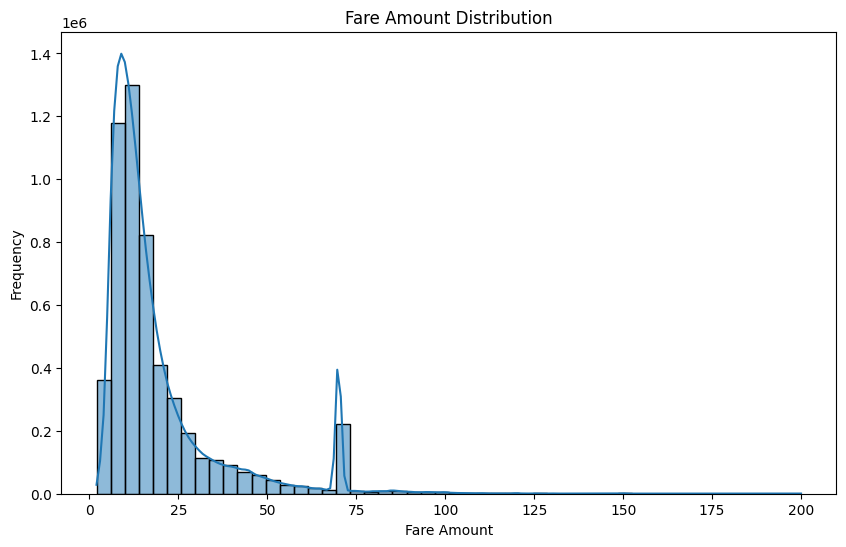

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['fare_amount'], bins=50, kde=True)
plt.title('Fare Amount Distribution')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.show()


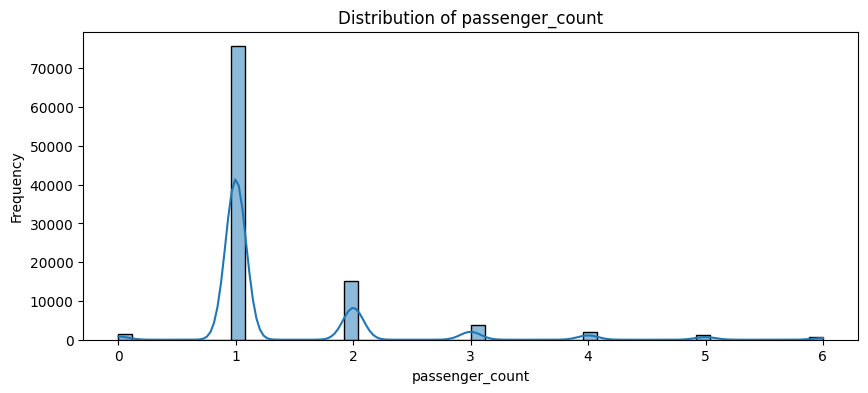

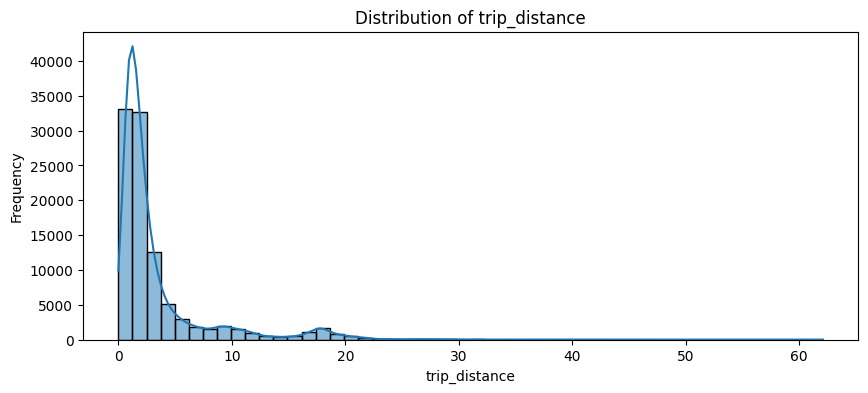

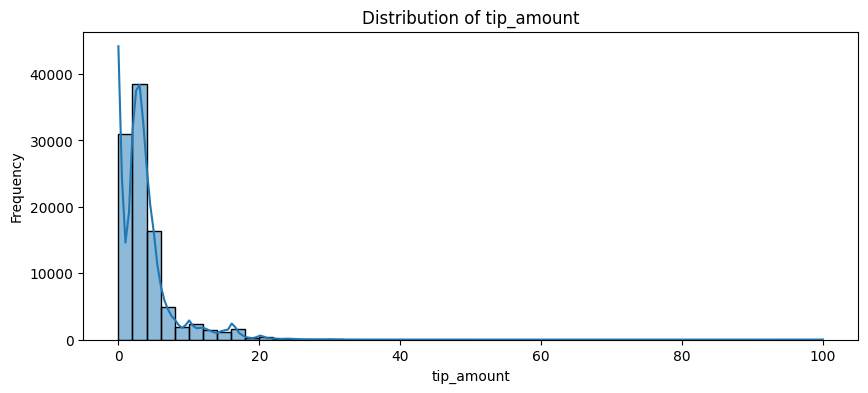

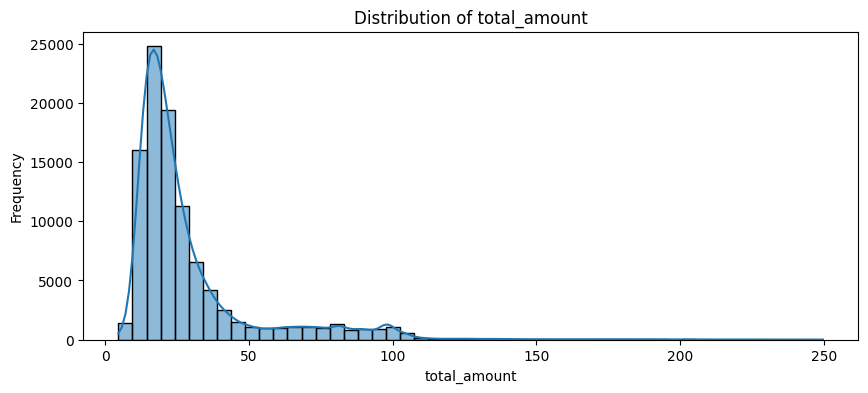

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sample_df = merged_df.sample(n=100000, random_state=42)

numerical_cols_for_plot = ['passenger_count', 'trip_distance', 'tip_amount', 'total_amount']

for col in numerical_cols_for_plot:
    plt.figure(figsize=(10, 4))
    sns.histplot(sample_df[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


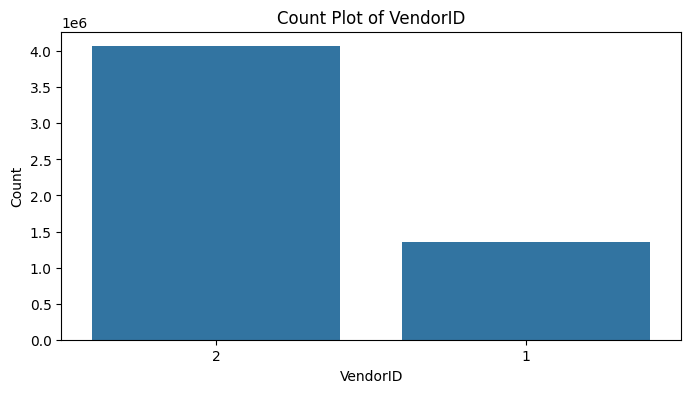

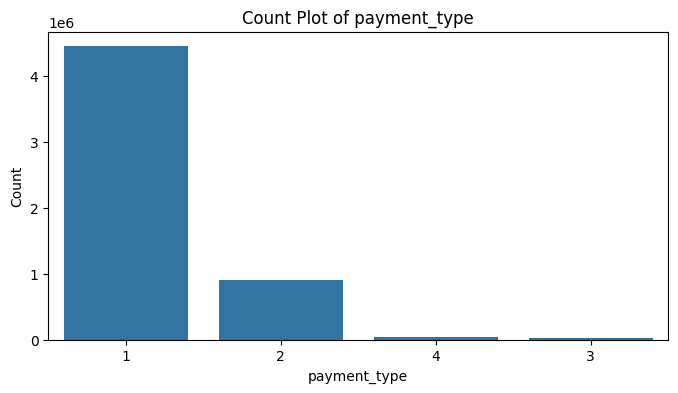

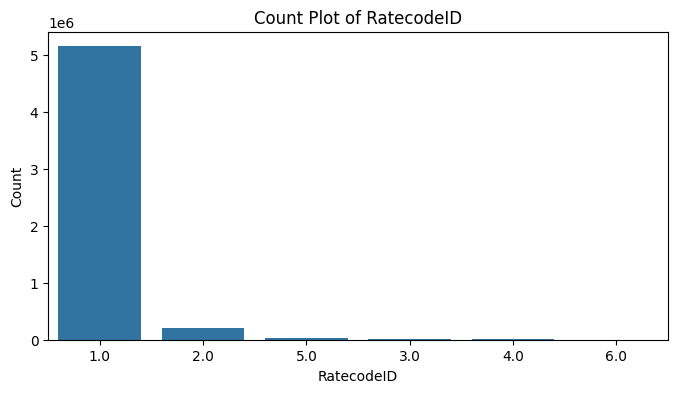

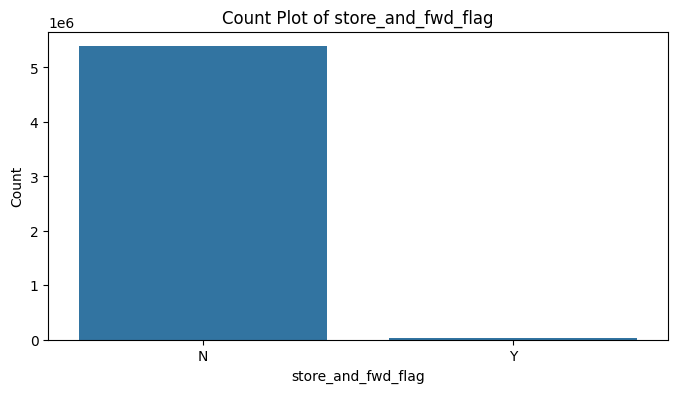

In [ ]:
categorical_cols = ['VendorID', 'payment_type', 'RatecodeID', 'store_and_fwd_flag']

# Count plots for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=merged_df, order=merged_df[col].value_counts().index)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


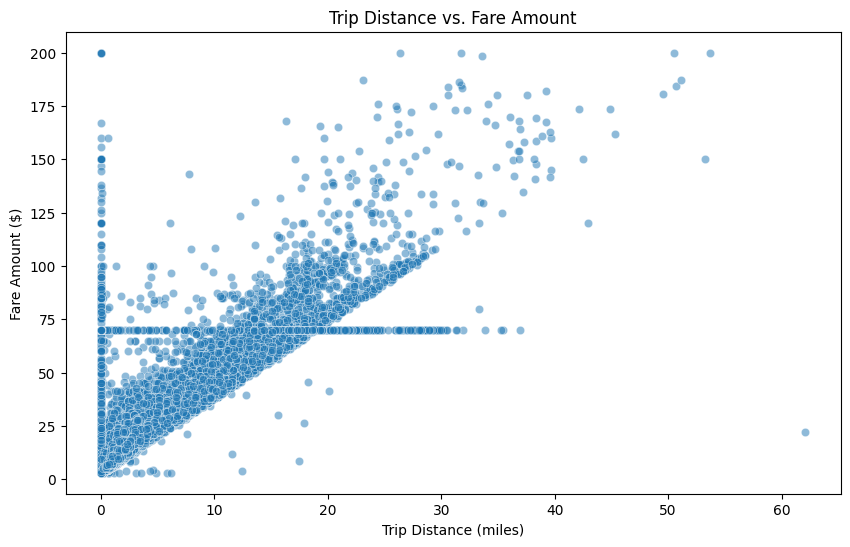

In [ ]:
# Scatter plot of trip_distance vs. fare_amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=sample_df, alpha=0.5)
plt.title('Trip Distance vs. Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.show()


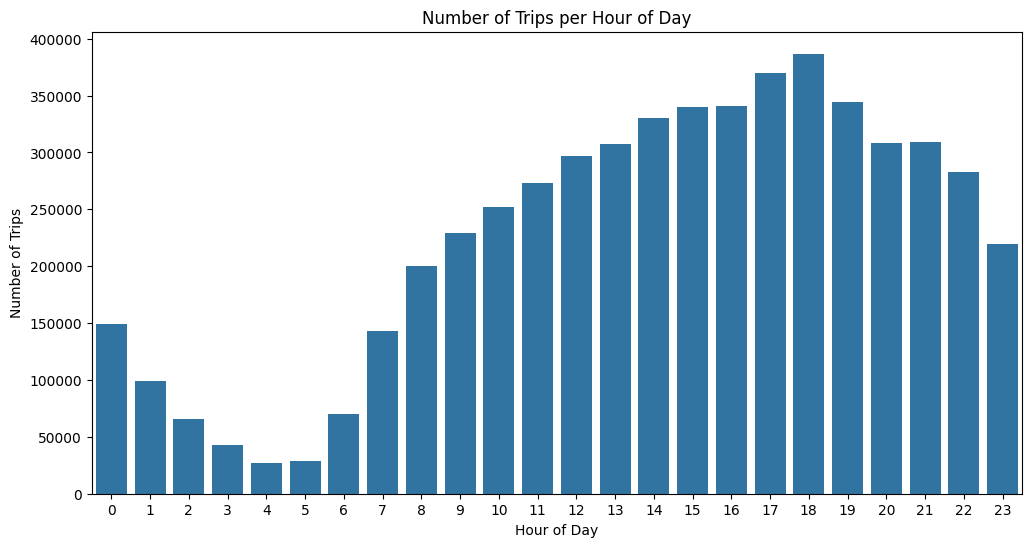

In [ ]:

if 'pickup_hour' not in merged_df.columns:
    merged_df['pickup_hour'] = merged_df['tpep_pickup_datetime'].dt.hour

trips_per_hour = merged_df.groupby('pickup_hour').size().reset_index(name='trip_count')

plt.figure(figsize=(12, 6))
sns.barplot(x='pickup_hour', y='trip_count', data=trips_per_hour)
plt.title('Number of Trips per Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24))
plt.show()


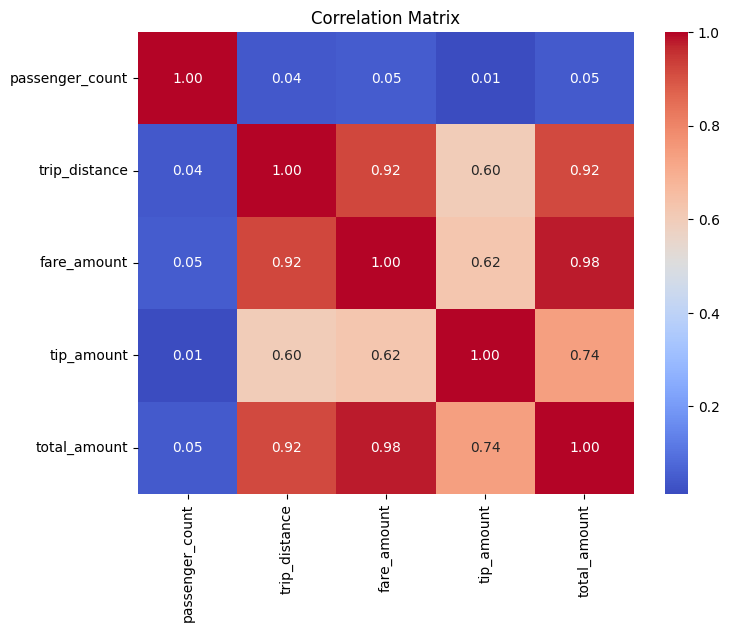

In [ ]:
corr_cols = ['passenger_count', 'trip_distance', 'fare_amount', 'tip_amount', 'total_amount']

#correlation matrix
corr_matrix = merged_df[corr_cols].corr()

#heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Loading the taxi zone lookup data
zones = pd.read_csv('/content/drive/MyDrive/capstone/taxi_zone_lookup.csv')

# Merging pickup location data
merged_df = merged_df.merge(zones, left_on='PULocationID', right_on='LocationID', how='left')
merged_df.rename(columns={'Borough': 'PU_Borough', 'Zone': 'PU_Zone', 'service_zone': 'PU_Service_Zone'}, inplace=True)
merged_df.drop('LocationID', axis=1, inplace=True)

# Merging drop-off location data
merged_df = merged_df.merge(zones, left_on='DOLocationID', right_on='LocationID', how='left')
merged_df.rename(columns={'Borough': 'DO_Borough', 'Zone': 'DO_Zone', 'service_zone': 'DO_Service_Zone'}, inplace=True)
merged_df.drop('LocationID', axis=1, inplace=True)


In [ ]:
print(merged_df.columns)


Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'hour',
       'pickup_hour', 'PU_Borough', 'PU_Zone', 'PU_Service_Zone', 'DO_Borough',
       'DO_Zone', 'DO_Service_Zone'],
      dtype='object')


In [ ]:
# Renaming duplicate columns (if needed)
merged_df = merged_df.loc[:, ~merged_df.columns.duplicated()]


In [ ]:
# Removing rows where DO_Borough or PU_Borough is 'Unknown'
merged_df = merged_df[(merged_df['DO_Borough'] != 'Unknown') & (merged_df['PU_Borough'] != 'Unknown')]


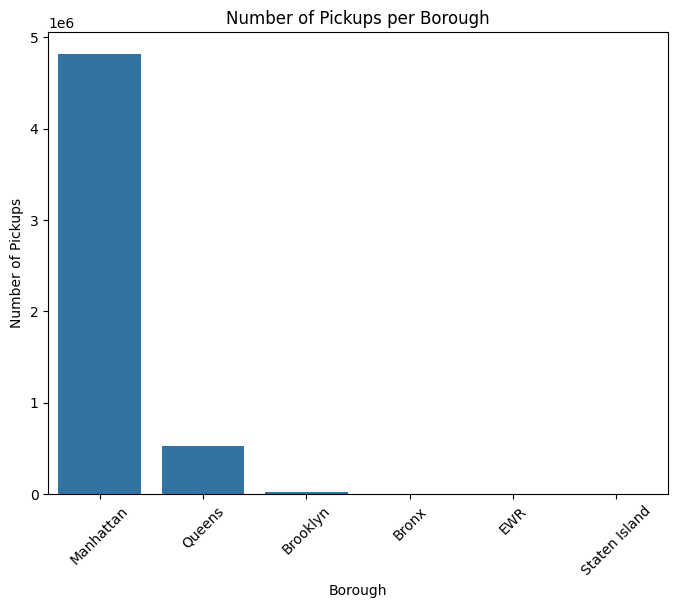

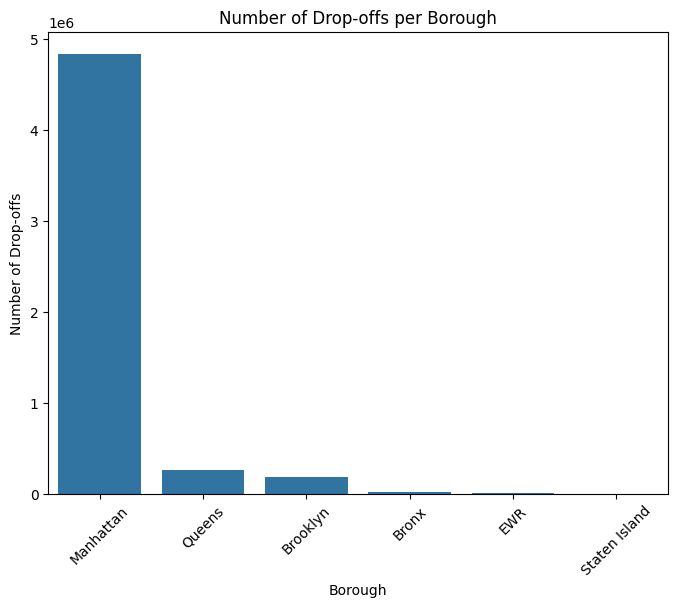

In [ ]:
# Number of pickups per borough
pickup_borough_counts = merged_df['PU_Borough'].value_counts().reset_index()
pickup_borough_counts.columns = ['Borough', 'Pickup_Count']

# Plot pickups per borough
plt.figure(figsize=(8, 6))
sns.barplot(x='Borough', y='Pickup_Count', data=pickup_borough_counts)
plt.title('Number of Pickups per Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.show()

# Number of drop-offs per borough
dropoff_borough_counts = merged_df['DO_Borough'].value_counts().reset_index()
dropoff_borough_counts.columns = ['Borough', 'Dropoff_Count']

# Plot drop-offs per borough
plt.figure(figsize=(8, 6))
sns.barplot(x='Borough', y='Dropoff_Count', data=dropoff_borough_counts)
plt.title('Number of Drop-offs per Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Drop-offs')
plt.xticks(rotation=45)
plt.show()


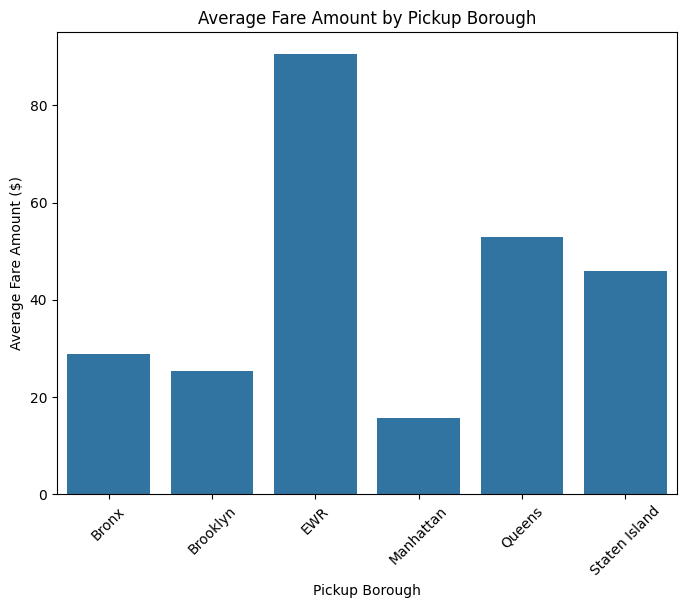

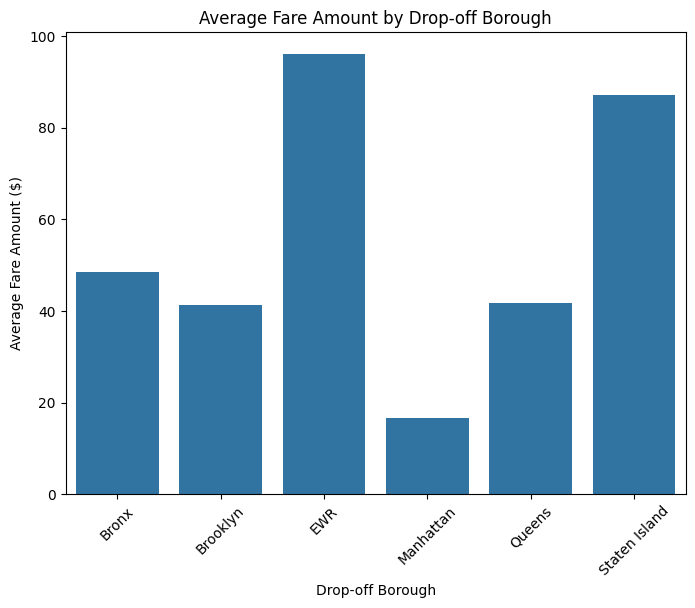

In [ ]:
# Average fare amount by pickup borough
fare_by_pu_borough = merged_df.groupby('PU_Borough')['fare_amount'].mean().reset_index()

# Plot average fare amount by pickup borough
plt.figure(figsize=(8, 6))
sns.barplot(x='PU_Borough', y='fare_amount', data=fare_by_pu_borough)
plt.title('Average Fare Amount by Pickup Borough')
plt.xlabel('Pickup Borough')
plt.ylabel('Average Fare Amount ($)')
plt.xticks(rotation=45)
plt.show()

# Average fare amount by drop-off borough
fare_by_do_borough = merged_df.groupby('DO_Borough')['fare_amount'].mean().reset_index()

# Plot average fare amount by drop-off borough
plt.figure(figsize=(8, 6))
sns.barplot(x='DO_Borough', y='fare_amount', data=fare_by_do_borough)
plt.title('Average Fare Amount by Drop-off Borough')
plt.xlabel('Drop-off Borough')
plt.ylabel('Average Fare Amount ($)')
plt.xticks(rotation=45)
plt.show()


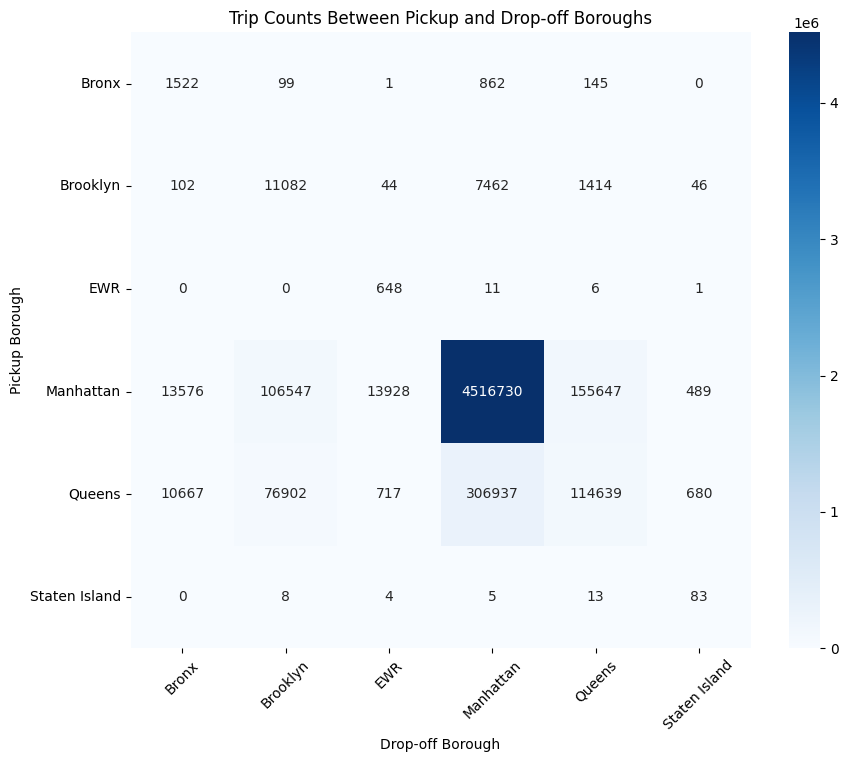

In [ ]:
# pivot table of trip counts between pickup and drop-off boroughs
trip_flow = merged_df.pivot_table(index='PU_Borough', columns='DO_Borough', values='fare_amount', aggfunc='count', fill_value=0)

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(trip_flow, annot=True, fmt='d', cmap='Blues')
plt.title('Trip Counts Between Pickup and Drop-off Boroughs')
plt.xlabel('Drop-off Borough')
plt.ylabel('Pickup Borough')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


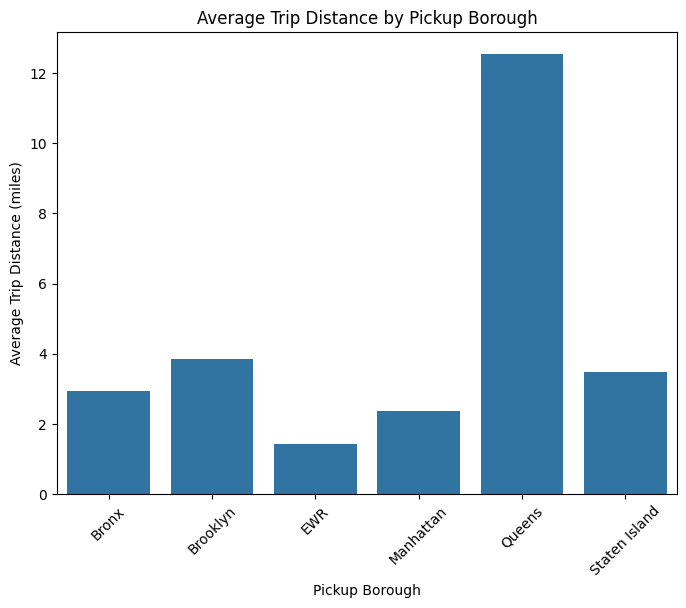

In [ ]:
# Average trip distance by pickup borough
distance_by_pu_borough = merged_df.groupby('PU_Borough')['trip_distance'].mean().reset_index()

# Ploting average trip distance by pickup borough
plt.figure(figsize=(8, 6))
sns.barplot(x='PU_Borough', y='trip_distance', data=distance_by_pu_borough)
plt.title('Average Trip Distance by Pickup Borough')
plt.xlabel('Pickup Borough')
plt.ylabel('Average Trip Distance (miles)')
plt.xticks(rotation=45)
plt.show()


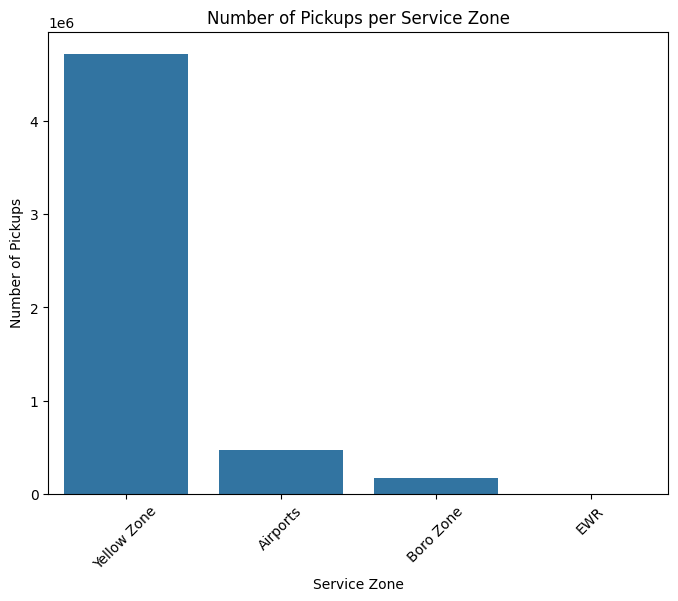

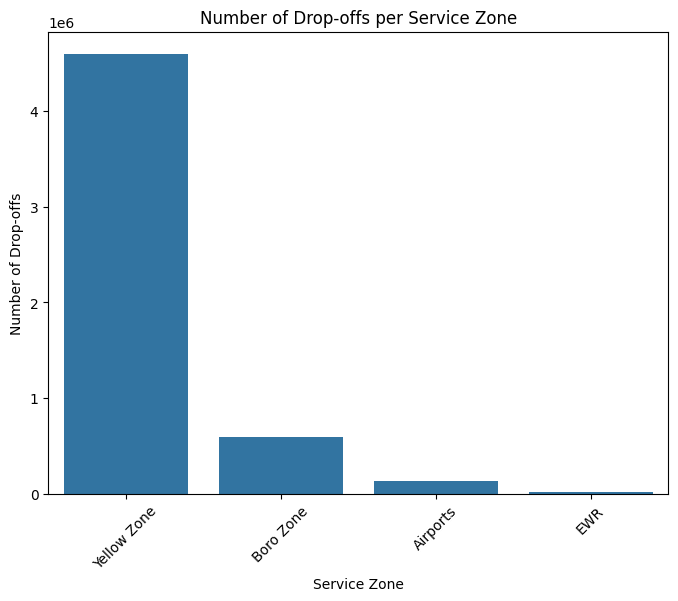

In [ ]:
# Number of pickups per service zone
pickup_service_zone_counts = merged_df['PU_Service_Zone'].value_counts().reset_index()
pickup_service_zone_counts.columns = ['Service Zone', 'Pickup_Count']

# Ploting pickups per service zone
plt.figure(figsize=(8, 6))
sns.barplot(x='Service Zone', y='Pickup_Count', data=pickup_service_zone_counts)
plt.title('Number of Pickups per Service Zone')
plt.xlabel('Service Zone')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.show()

# Number of drop-offs per service zone
dropoff_service_zone_counts = merged_df['DO_Service_Zone'].value_counts().reset_index()
dropoff_service_zone_counts.columns = ['Service Zone', 'Dropoff_Count']

# Ploting drop-offs per service zone
plt.figure(figsize=(8, 6))
sns.barplot(x='Service Zone', y='Dropoff_Count', data=dropoff_service_zone_counts)
plt.title('Number of Drop-offs per Service Zone')
plt.xlabel('Service Zone')
plt.ylabel('Number of Drop-offs')
plt.xticks(rotation=45)
plt.show()


<ipython-input-273-f02c7a298b41>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airport_trips['Airport_Trip_Type'] = airport_trips.apply(airport_trip_type, axis=1)


Number of Trips Involving Airports:
Airport_Trip_Type
Pickup      449187
Drop-off    120857
Both         22209
Name: count, dtype: int64

Average Fare Amount for Airport Trips: $56.07


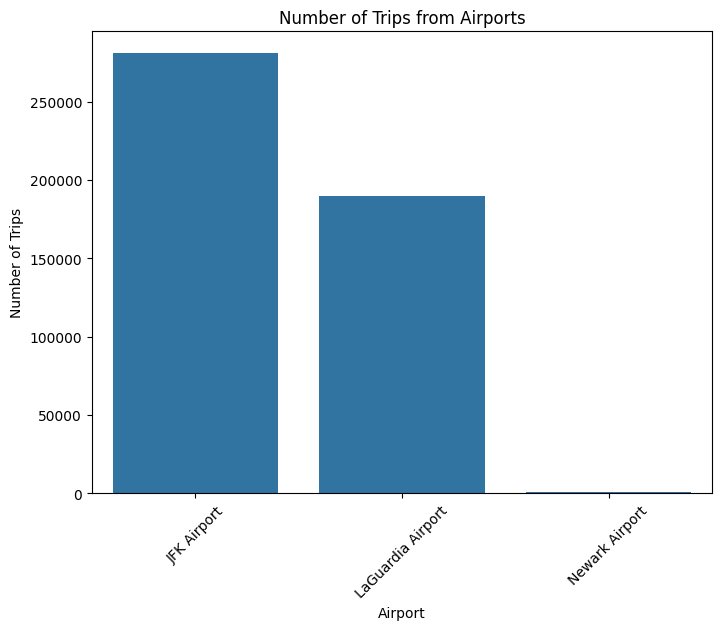

In [ ]:
# Filter trips involving airports
# Handle NaN values in 'Zone' by setting na=False
airport_ids = zones[zones['Zone'].str.contains('Airport', na=False)]['LocationID'].unique()

# Trips with airport as pickup or drop-off
airport_trips = merged_df[
    (merged_df['PULocationID'].isin(airport_ids)) |
    (merged_df['DOLocationID'].isin(airport_ids))
]

# Determine if the trip is a pickup or drop-off at an airport
# Create a column to indicate 'Pickup', 'Drop-off', or 'Both' if applicable
def airport_trip_type(row):
    pickup = row['PULocationID'] in airport_ids
    dropoff = row['DOLocationID'] in airport_ids
    if pickup and dropoff:
        return 'Both'
    elif pickup:
        return 'Pickup'
    elif dropoff:
        return 'Drop-off'
    else:
        return 'Neither'

airport_trips['Airport_Trip_Type'] = airport_trips.apply(airport_trip_type, axis=1)

# Number of trips involving each type
airport_trip_counts = airport_trips['Airport_Trip_Type'].value_counts()

print("Number of Trips Involving Airports:")
print(airport_trip_counts)

# Average fare amount for airport trips
airport_fare = airport_trips['fare_amount'].mean()
print(f"\nAverage Fare Amount for Airport Trips: ${airport_fare:.2f}")

# Ploting number of trips per airport
# Group by airport zone
airport_trip_counts_by_zone = airport_trips[airport_trips['PU_Zone'].str.contains('Airport', na=False)].groupby('PU_Zone').size().reset_index(name='Trip_Count')

plt.figure(figsize=(8, 6))
sns.barplot(x='PU_Zone', y='Trip_Count', data=airport_trip_counts_by_zone)
plt.title('Number of Trips from Airports')
plt.xlabel('Airport')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()


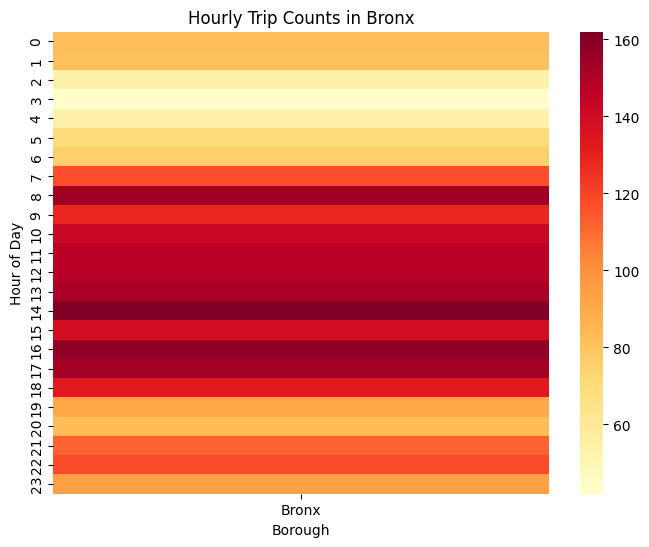

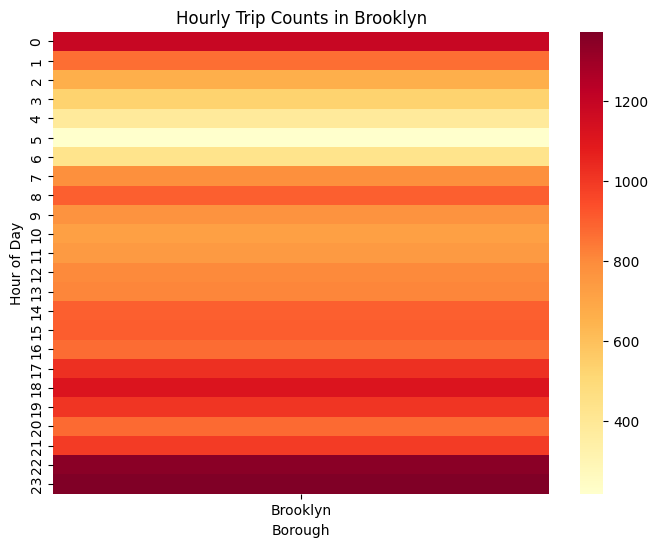

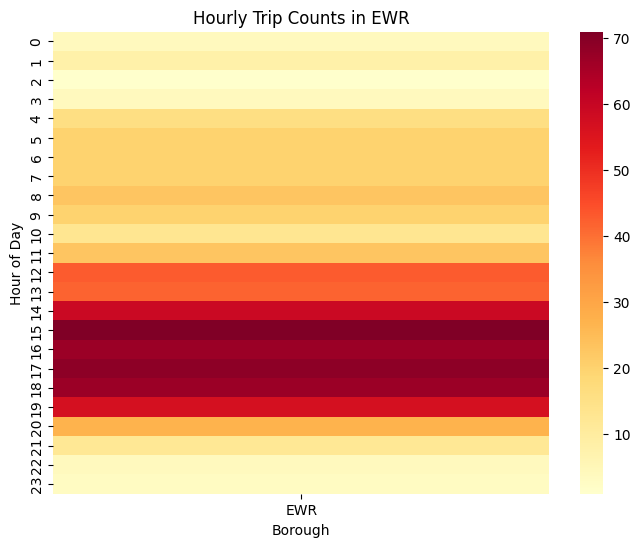

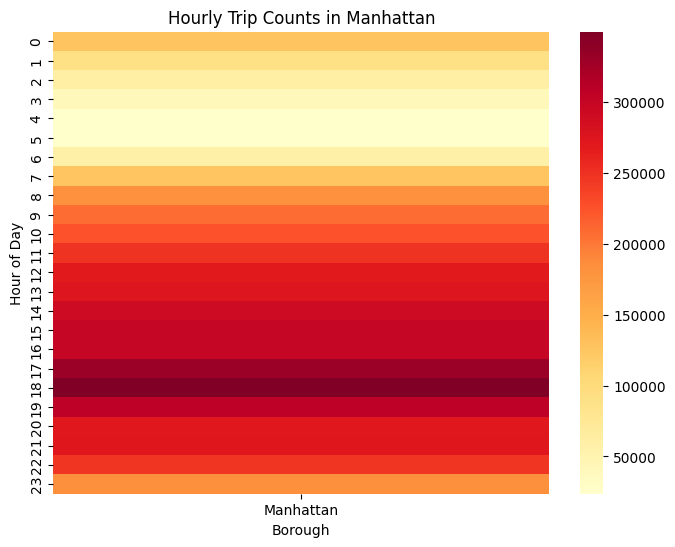

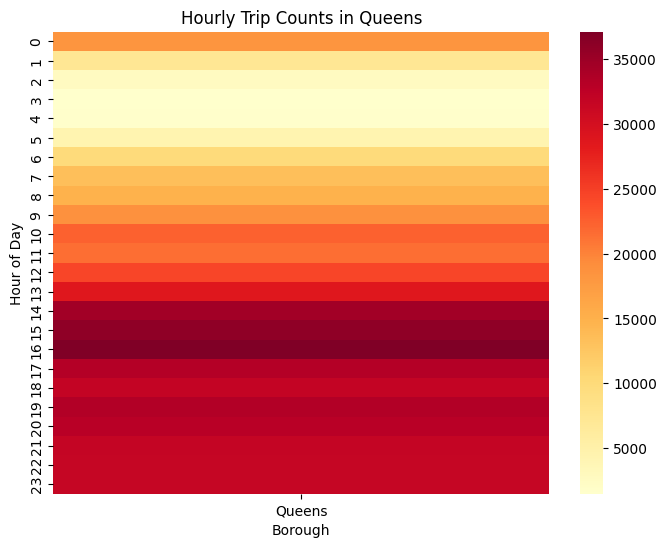

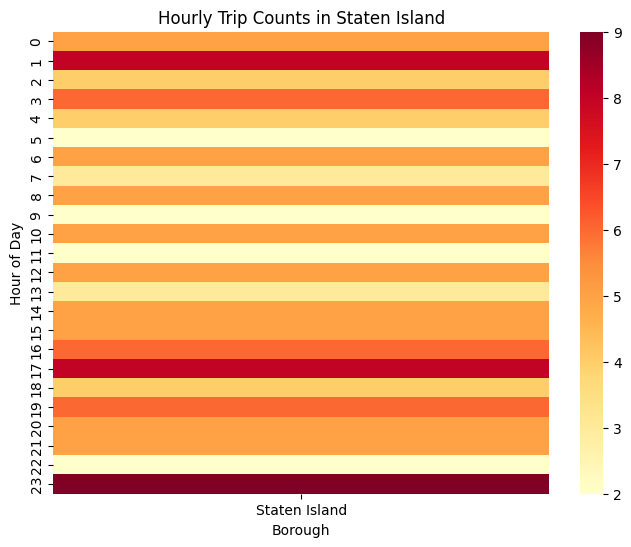

In [ ]:
# Grouping data by borough and hour
borough_hourly = merged_df.groupby(['PU_Borough', 'pickup_hour']).size().reset_index(name='Trip_Count')

# Ploting heatmaps for each borough
boroughs = borough_hourly['PU_Borough'].unique()

for borough in boroughs:
    data = borough_hourly[borough_hourly['PU_Borough'] == borough]
    pivot = data.pivot(index='pickup_hour', columns='PU_Borough', values='Trip_Count')

    plt.figure(figsize=(8, 6))
    sns.heatmap(pivot, cmap='YlOrRd')
    plt.title(f'Hourly Trip Counts in {borough}')
    plt.xlabel('Borough')
    plt.ylabel('Hour of Day')
    plt.show()


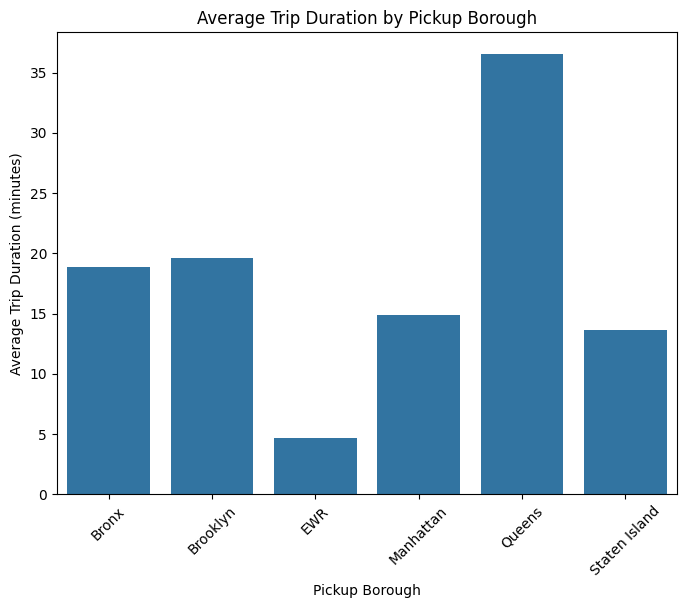

In [ ]:
merged_df['tpep_pickup_datetime'] = pd.to_datetime(merged_df['tpep_pickup_datetime'])
merged_df['tpep_dropoff_datetime'] = pd.to_datetime(merged_df['tpep_dropoff_datetime'])

merged_df.dropna(subset=['tpep_pickup_datetime', 'tpep_dropoff_datetime'], inplace=True)

# Calculating trip duration in minutes
merged_df['trip_duration'] = (merged_df['tpep_dropoff_datetime'] - merged_df['tpep_pickup_datetime']).dt.total_seconds() / 60

# Removing trips with zero or negative duration
merged_df = merged_df[merged_df['trip_duration'] > 0]

duration_by_pu_borough = merged_df.groupby('PU_Borough')['trip_duration'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='PU_Borough', y='trip_duration', data=duration_by_pu_borough)
plt.title('Average Trip Duration by Pickup Borough')
plt.xlabel('Pickup Borough')
plt.ylabel('Average Trip Duration (minutes)')
plt.xticks(rotation=45)
plt.show()


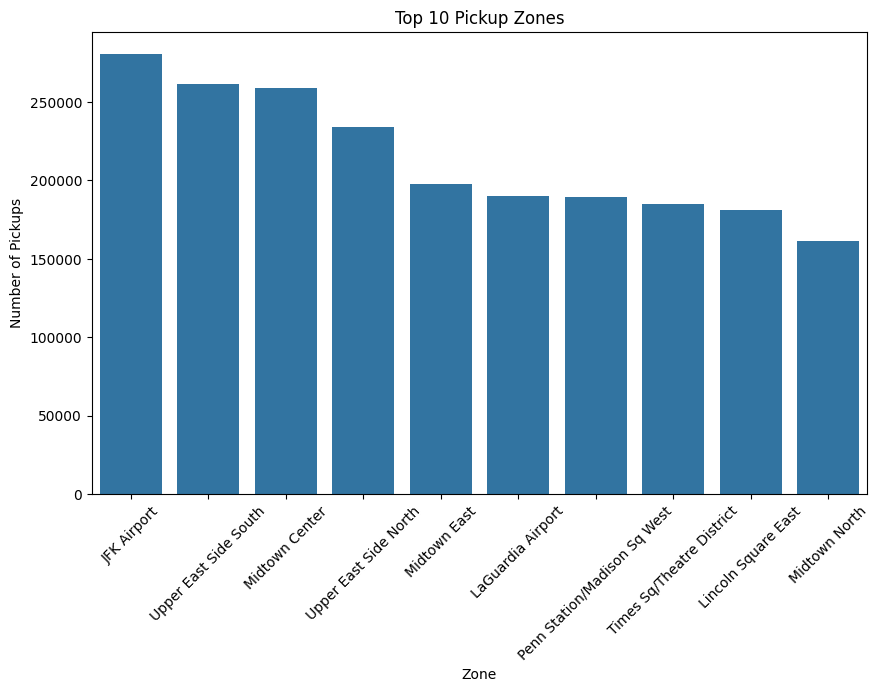

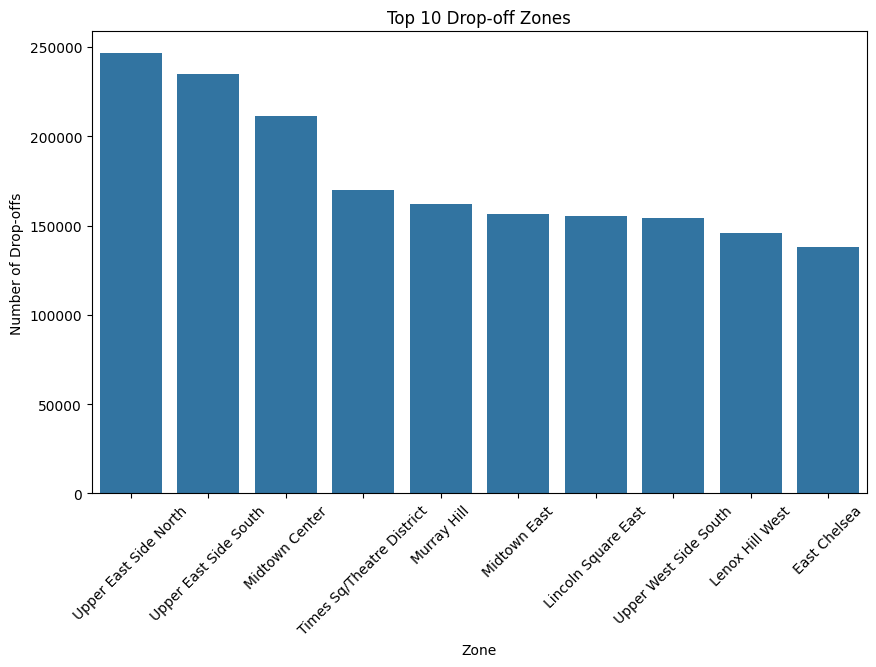

In [ ]:
# Top 10 pickup zones
top_pu_zones = merged_df['PU_Zone'].value_counts().head(10).reset_index()
top_pu_zones.columns = ['Zone', 'Pickup_Count']

# Plot top pickup zones
plt.figure(figsize=(10, 6))
sns.barplot(x='Zone', y='Pickup_Count', data=top_pu_zones)
plt.title('Top 10 Pickup Zones')
plt.xlabel('Zone')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.show()

# Top 10 drop-off zones
top_do_zones = merged_df['DO_Zone'].value_counts().head(10).reset_index()
top_do_zones.columns = ['Zone', 'Dropoff_Count']

# Plot top drop-off zones
plt.figure(figsize=(10, 6))
sns.barplot(x='Zone', y='Dropoff_Count', data=top_do_zones)
plt.title('Top 10 Drop-off Zones')
plt.xlabel('Zone')
plt.ylabel('Number of Drop-offs')
plt.xticks(rotation=45)
plt.show()


<ipython-input-277-f96247fe44f0>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['tip_percentage'].replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-277-f96247fe44f0>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(

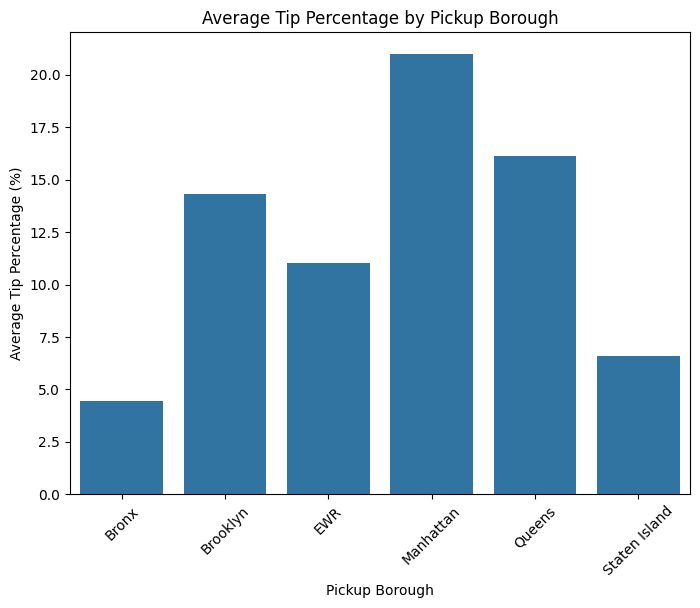

In [ ]:
merged_df['fare_amount'] = pd.to_numeric(merged_df['fare_amount'], errors='coerce')
merged_df['tip_amount'] = pd.to_numeric(merged_df['tip_amount'], errors='coerce')

merged_df = merged_df[merged_df['fare_amount'] > 0]

merged_df['tip_percentage'] = (merged_df['tip_amount'] / merged_df['fare_amount']) * 100

import numpy as np
merged_df['tip_percentage'].replace([np.inf, -np.inf], np.nan, inplace=True)
merged_df['tip_percentage'].fillna(0, inplace=True)

merged_df = merged_df[(merged_df['tip_percentage'] >= 0) & (merged_df['tip_percentage'] <= 100)]

tip_by_pu_borough = merged_df.groupby('PU_Borough')['tip_percentage'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='PU_Borough', y='tip_percentage', data=tip_by_pu_borough)
plt.title('Average Tip Percentage by Pickup Borough')
plt.xlabel('Pickup Borough')
plt.ylabel('Average Tip Percentage (%)')
plt.xticks(rotation=45)
plt.show()


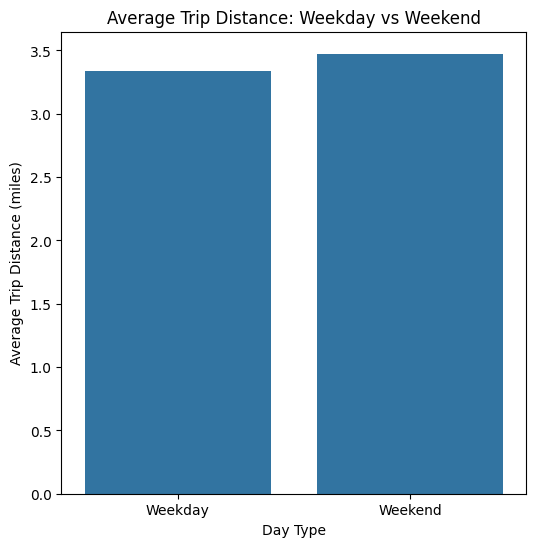

In [ ]:
# Creating a new column for day type
merged_df['day_of_week'] = merged_df['tpep_pickup_datetime'].dt.dayofweek
merged_df['day_type'] = merged_df['day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

distance_by_day_type = merged_df.groupby('day_type')['trip_distance'].mean().reset_index()

# Ploting average trip distance by day type
plt.figure(figsize=(6, 6))
sns.barplot(x='day_type', y='trip_distance', data=distance_by_day_type)
plt.title('Average Trip Distance: Weekday vs Weekend')
plt.xlabel('Day Type')
plt.ylabel('Average Trip Distance (miles)')
plt.show()


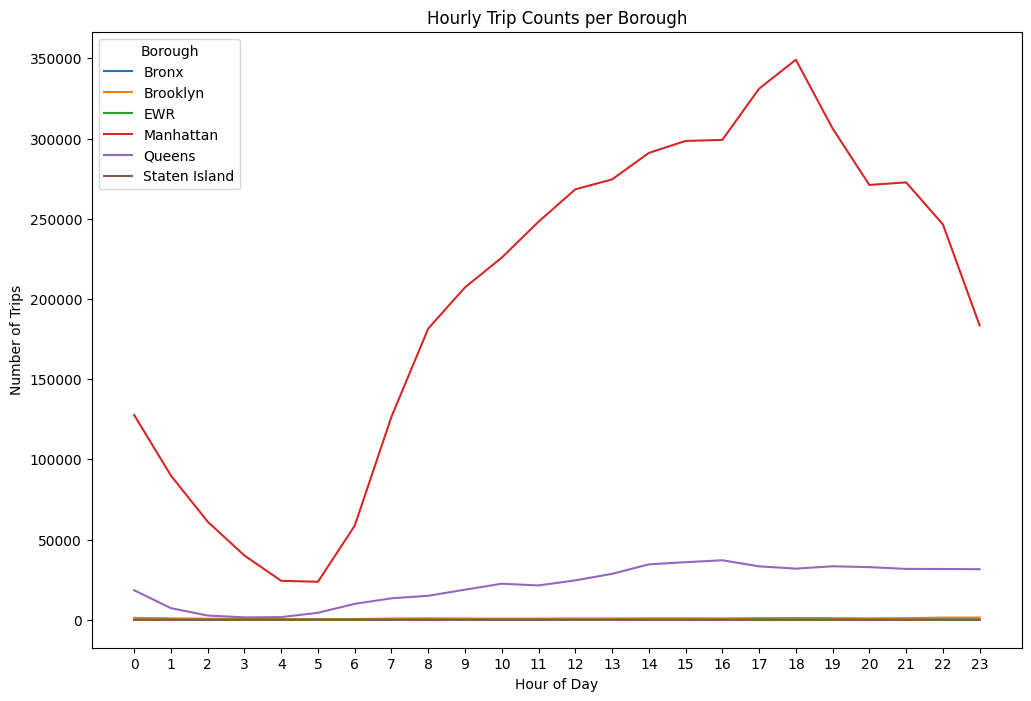

In [ ]:
# Grouping data by pickup borough and hour
borough_hourly_counts = merged_df.groupby(['PU_Borough', 'pickup_hour']).size().reset_index(name='Trip_Count')

# Ploting line charts for each borough
plt.figure(figsize=(12, 8))
sns.lineplot(data=borough_hourly_counts, x='pickup_hour', y='Trip_Count', hue='PU_Borough')
plt.title('Hourly Trip Counts per Borough')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24))
plt.legend(title='Borough')
plt.show()


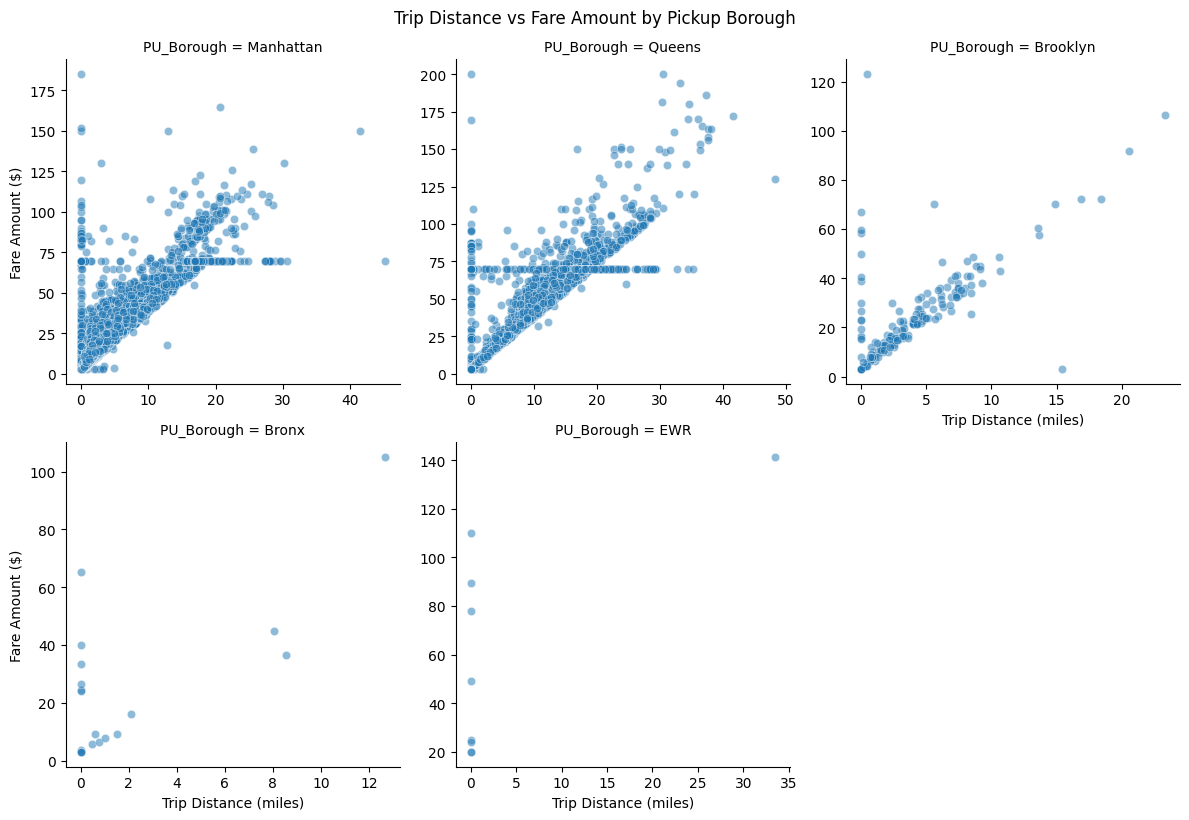

In [ ]:
sample_df = merged_df.sample(n=50000, random_state=42)

# Ploting scatter plots for each borough
g = sns.FacetGrid(sample_df, col='PU_Borough', col_wrap=3, height=4, sharex=False, sharey=False)
g.map(sns.scatterplot, 'trip_distance', 'fare_amount', alpha=0.5)
g.set_axis_labels('Trip Distance (miles)', 'Fare Amount ($)')
g.fig.suptitle('Trip Distance vs Fare Amount by Pickup Borough', y=1.02)
plt.show()


In [ ]:
print(merged_df.head())
print(merged_df.columns)

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-10-08 00:41:58   2023-10-08 01:06:36              1.0   
1         2  2024-04-03 00:01:42   2024-04-03 00:12:58              1.0   
2         2  2023-05-21 00:18:22   2023-05-21 00:30:13              1.0   
3         1  2023-07-31 00:27:19   2023-07-31 01:01:12              2.0   
4         2  2023-09-04 00:40:45   2023-09-04 00:45:25              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0          10.85         1.0                  N            70           239   
1           2.60         1.0                  N            79           140   
2           1.36         1.0                  N           114            79   
3          20.20         1.0                  N           132            40   
4           1.62         1.0                  N            79           233   

   payment_type  ...  PU_Borough                  PU_Zone  PU_Service_Zone

In [ ]:
!pip install geopandas


In [ ]:
import geopandas as gpd

# Loading the shapefile into a GeoDataFrame
gdf = gpd.read_file('/content/taxi_zones.shp')

# Displaying the first few rows of the GeoDataFrame
print(gdf.head())


   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...  


In [ ]:
# Convert GeoDataFrame to a Pandas DataFrame
df = gdf

# Display the first few rows of the DataFrame
print(df['geometry'].type)


0           Polygon
1      MultiPolygon
2           Polygon
3           Polygon
4           Polygon
           ...     
258         Polygon
259         Polygon
260         Polygon
261    MultiPolygon
262         Polygon
Length: 263, dtype: object


In [ ]:
gdf.to_csv('output.csv')

In [ ]:
# Check the CRS of the shapefile
print(gdf.crs)


EPSG:2263


In [ ]:
from pyproj import CRS

# Load the .prj file content
prj_file = '/content/taxi_zones.prj'

# Read the CRS from the .prj file
with open(prj_file, 'r') as file:
    prj_content = file.read()

# Parse the CRS
crs = CRS.from_wkt(prj_content)
print(crs)


PROJCS["NAD_1983_StatePlane_New_York_Long_Island_FIPS_3104_Feet",GEOGCS["GCS_North_American_1983",DATUM["D_North_American_1983",SPHEROID["GRS_1980",6378137.0,298.257222101]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]],PROJECTION["Lambert_Conformal_Conic"],PARAMETER["False_Easting",984250.0],PARAMETER["False_Northing",0.0],PARAMETER["Central_Meridian",-74.0],PARAMETER["Standard_Parallel_1",40.66666666666666],PARAMETER["Standard_Parallel_2",41.03333333333333],PARAMETER["Latitude_Of_Origin",40.16666666666666],UNIT["Foot_US",0.3048006096012192]]


In [ ]:
# Assign the correct CRS from the .prj file
gdf = gdf.set_crs(crs)

# Convert to WGS84 (latitude and longitude)
gdf_wgs84 = gdf.to_crs(epsg=4326)

# Display the transformed GeoDataFrame
print(gdf_wgs84.head())


   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((-74.18445 40.695, -74.18449 40.6951,...  
1         Queens  MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...  
2          Bronx  POLYGON ((-73.84793 40.87134, -73.84725 40.870...  
3      Manhattan  POLYGON ((-73.97177 40.72582, -73.97179 40.725...  
4  Staten Island  POLYGON ((-74.17422 40.56257, -74.17349 40.562...  


In [ ]:
# Save the GeoDataFrame to a new shapefile
output_shapefile = '/content/taxi_zones_wgs84.shp'
gdf_wgs84.to_file(output_shapefile)

print(f"Shapefile saved as: {output_shapefile}")


Shapefile saved as: /content/taxi_zones_wgs84.shp


In [ ]:

# Load the CSV file with WGS84 coordinates
taxi_zones_df = pd.read_csv('/content/taxi_zones_wgs84.csv')


# Merge for pickup location: map PULocationID to pickup_longitude and pickup_latitude
merged_df = merged_df.merge(taxi_zones_df[['LocationID', 'X', 'Y']],
                            left_on='PULocationID', right_on='LocationID',
                            how='left').rename(columns={'X': 'pickup_longitude', 'Y': 'pickup_latitude'})

# Merge for dropoff location: map DOLocationID to dropoff_longitude and dropoff_latitude
merged_df = merged_df.merge(taxi_zones_df[['LocationID', 'X', 'Y']],
                            left_on='DOLocationID', right_on='LocationID',
                            how='left').rename(columns={'X': 'dropoff_longitude', 'Y': 'dropoff_latitude'})

# Drop the redundant 'LocationID' columns from the merges
merged_df = merged_df.drop(columns=['LocationID_x', 'LocationID_y'])

# Display the first few rows of the updated DataFrame
print(merged_df.head())

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-10-08 00:41:58   2023-10-08 01:06:36              1.0   
1         2  2024-04-03 00:01:42   2024-04-03 00:12:58              1.0   
2         2  2023-05-21 00:18:22   2023-05-21 00:30:13              1.0   
3         1  2023-07-31 00:27:19   2023-07-31 01:01:12              2.0   
4         2  2023-09-04 00:40:45   2023-09-04 00:45:25              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0          10.85         1.0                  N            70           239   
1           2.60         1.0                  N            79           140   
2           1.36         1.0                  N           114            79   
3          20.20         1.0                  N           132            40   
4           1.62         1.0                  N            79           233   

   payment_type  ...                DO_Zone  DO_Service_Zone  trip_duratio

In [ ]:
# Check for null values in the merged DataFrame
null_values = merged_df.isnull().sum()

# Display the columns with null values
print(null_values[null_values > 0])


PU_Borough            2450
PU_Service_Zone       2450
DO_Borough           21006
DO_Service_Zone      21006
pickup_longitude      2460
pickup_latitude       2460
dropoff_longitude    21094
dropoff_latitude     21094
dtype: int64


In [ ]:
# Drop rows with any null values
cleaned_df = merged_df.dropna()

# Check if nulls remain
print(cleaned_df.isnull().sum())

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
hour                     0
pickup_hour              0
PU_Borough               0
PU_Zone                  0
PU_Service_Zone          0
DO_Borough               0
DO_Zone                  0
DO_Service_Zone          0
trip_duration            0
tip_percentage           0
day_of_week              0
day_type                 0
pickup_longitude         0
pickup_latitude          0
dropoff_longitude        0
dropoff_latitude         0
dtype: int64


In [ ]:
merged_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'hour',
       'pickup_hour', 'PU_Borough', 'PU_Zone', 'PU_Service_Zone', 'DO_Borough',
       'DO_Zone', 'DO_Service_Zone', 'trip_duration', 'tip_percentage',
       'day_of_week', 'day_type', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude'],
      dtype='object')

In [ ]:
import pandas as pd

#Counting the number of trips per borough per hour
borough_hourly_counts = cleaned_df.groupby(['PU_Borough', 'pickup_hour']).size().reset_index(name='trip_count')

#Calculate the threshold for each borough to identify peak hours
#top 25% of trips are considered peak
borough_hourly_counts['peak_threshold'] = borough_hourly_counts.groupby('PU_Borough')['trip_count'].transform(lambda x: x.quantile(0.75))

#Labeling peak hours (1 for peak hour, 0 for non-peak hour)
borough_hourly_counts['peak_hour'] = (borough_hourly_counts['trip_count'] >= borough_hourly_counts['peak_threshold']).astype(int)

#Merging back with the original dataset to add the 'peak_hour' column
cleaned_df = pd.merge(cleaned_df, borough_hourly_counts[['PU_Borough', 'pickup_hour', 'peak_hour']], on=['PU_Borough', 'pickup_hour'], how='left')


In [ ]:
columns_to_select = {
    'VendorID': 'vendor_id',
    'tpep_pickup_datetime': 'pickup_datetime',
    'tpep_dropoff_datetime': 'dropoff_datetime',
    'passenger_count': 'passenger_count',
    'pickup_longitude': 'pickup_longitude',
    'pickup_latitude': 'pickup_latitude',
    'dropoff_longitude': 'dropoff_longitude',
    'dropoff_latitude': 'dropoff_latitude',
    'store_and_fwd_flag': 'store_and_fwd_flag',
    'trip_duration': 'trip_duration',
    'peak_hour':'peak_hour',
    'fare_amount':'fare_amount'
}

# Create the new DataFrame 'train' with selected and renamed columns
train = cleaned_df.rename(columns=columns_to_select)[list(columns_to_select.values())]

# Display the first few rows of the 'train' DataFrame
train.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,peak_hour,fare_amount
0,2,2023-10-08 00:41:58,2023-10-08 01:06:36,1.0,-73.868405,40.763948,-73.978273,40.784107,N,24.633333,0,43.6
1,2,2024-04-03 00:01:42,2024-04-03 00:12:58,1.0,-73.985214,40.727944,-73.954568,40.765507,N,11.266667,0,13.5
2,2,2023-05-21 00:18:22,2023-05-21 00:30:13,1.0,-73.998678,40.728613,-73.985214,40.727944,N,11.850000,0,12.1
3,1,2023-07-31 00:27:19,2023-07-31 01:01:12,2.0,-73.778341,40.642683,-73.995818,40.678504,N,33.883333,0,76.5
4,2,2023-09-04 00:40:45,2023-09-04 00:45:25,2.0,-73.985214,40.727944,-73.971255,40.749174,N,4.666667,0,8.6


In [ ]:
# Check for duplicate column names
print(train.columns[train.columns.duplicated()])


Index([], dtype='object')


In [ ]:
train = train[train['pickup_longitude'] <= -73.75]
train = train[train['pickup_longitude'] >= -74.03]
train = train[train['pickup_latitude'] <= 40.85]
train = train[train['pickup_latitude'] >= 40.63]
train = train[train['dropoff_longitude'] <= -73.75]
train = train[train['dropoff_longitude'] >= -74.03]
train = train[train['dropoff_latitude'] <= 40.85]
train = train[train['dropoff_latitude'] >= 40.63]

In [ ]:
# Convert trip_duration from minutes to seconds
train['trip_duration'] = train['trip_duration'] * 60

# Verify the change
print(train[['trip_duration']].head())

   trip_duration
0         1478.0
1          676.0
2          711.0
3         2033.0
4          280.0


<ipython-input-299-408f44680a1f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['trip_duration'] = train['trip_duration'] * 60


In [ ]:
train['log_trip_duration'] = np.log(train['trip_duration'].values + 1)

<ipython-input-300-cb2af0818654>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['log_trip_duration'] = np.log(train['trip_duration'].values + 1)


In [ ]:
train.columns

Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration', 'peak_hour',
       'fare_amount', 'log_trip_duration'],
      dtype='object')

In [ ]:
train[['pickup_longitude','pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude','trip_duration','log_trip_duration']].head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,log_trip_duration
0,-73.868405,40.763948,-73.978273,40.784107,1478.0,7.299121
1,-73.985214,40.727944,-73.954568,40.765507,676.0,6.517671
2,-73.998678,40.728613,-73.985214,40.727944,711.0,6.568078
3,-73.778341,40.642683,-73.995818,40.678504,2033.0,7.617760
4,-73.985214,40.727944,-73.971255,40.749174,280.0,5.638355


In [ ]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def dummy_manhattan_distance(lat1, lng1, lat2, lng2):
    a = haversine_array(lat1, lng1, lat1, lng2)
    b = haversine_array(lat1, lng1, lat2, lng1)
    return a + b

def bearing_array(lat1, lng1, lat2, lng2):
    AVG_EARTH_RADIUS = 6371  # in km
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))

In [ ]:
train.columns

Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration', 'peak_hour',
       'fare_amount', 'log_trip_duration'],
      dtype='object')

In [ ]:
train.loc[:, 'distance_haversine'] = haversine_array(train['pickup_latitude'].values, train['pickup_longitude'].values, train['dropoff_latitude'].values, train['dropoff_longitude'].values)

In [ ]:
train.loc[:, 'distance_dummy_manhattan'] =  dummy_manhattan_distance(train['pickup_latitude'].values, train['pickup_longitude'].values, train['dropoff_latitude'].values, train['dropoff_longitude'].values)

In [ ]:
train.loc[:, 'direction'] = bearing_array(train['pickup_latitude'].values, train['pickup_longitude'].values, train['dropoff_latitude'].values, train['dropoff_longitude'].values)

In [ ]:
coords = np.vstack((train[['pickup_latitude', 'pickup_longitude']].values,
                    train[['dropoff_latitude', 'dropoff_longitude']].values))

In [ ]:
from sklearn.cluster import MiniBatchKMeans

sample_ind = np.random.permutation(len(coords))[:500000]
kmeans = MiniBatchKMeans(n_clusters=100, batch_size=10000).fit(coords[sample_ind])

In [ ]:
train.loc[:, 'pickup_cluster'] = kmeans.predict(train[['pickup_latitude', 'pickup_longitude']])
train.loc[:, 'dropoff_cluster'] = kmeans.predict(train[['dropoff_latitude', 'dropoff_longitude']])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but MiniBatchKMeans was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but MiniBatchKMeans was fitted without feature names
  warnings.warn(


In [ ]:
#Extracting Month
train['Month'] = train['pickup_datetime'].dt.month

In [ ]:
train.groupby('Month').size()

,0
Month,
1,555857
2,540667
3,617766
4,601345
5,640620
6,596039
7,268543
8,260297
9,258042


In [ ]:
train['DayofMonth'] = train['pickup_datetime'].dt.day
len(train.groupby('DayofMonth').size())

31

In [ ]:
train['Hour'] = train['pickup_datetime'].dt.hour
len(train.groupby('Hour').size())

24

In [ ]:
train['dayofweek'] = train['pickup_datetime'].dt.dayofweek
len(train.groupby('dayofweek').size())

7

In [ ]:
train.loc[:, 'avg_speed_h'] = 1000 * train['distance_haversine'] / train['trip_duration']
train.loc[:, 'avg_speed_m'] = 1000 * train['distance_dummy_manhattan'] / train['trip_duration']


In [ ]:
train.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,...,distance_dummy_manhattan,direction,pickup_cluster,dropoff_cluster,Month,DayofMonth,Hour,dayofweek,avg_speed_h,avg_speed_m
0,2,2023-10-08 00:41:58,2023-10-08 01:06:36,1.0,-73.868405,40.763948,-73.978273,40.784107,N,1478.0,...,11.494661,-76.344173,69,7,10,8,0,6,6.440685,7.777172
1,2,2024-04-03 00:01:42,2024-04-03 00:12:58,1.0,-73.985214,40.727944,-73.954568,40.765507,N,676.0,...,6.759184,31.710138,34,59,4,3,0,2,7.263685,9.998793
2,2,2023-05-21 00:18:22,2023-05-21 00:30:13,1.0,-73.998678,40.728613,-73.985214,40.727944,N,711.0,...,1.208890,93.744468,14,34,5,21,0,6,1.599139,1.700267
3,1,2023-07-31 00:27:19,2023-07-31 01:01:12,2.0,-73.778341,40.642683,-73.995818,40.678504,N,2033.0,...,22.332295,-77.678836,2,51,7,31,0,0,9.233523,10.984897
4,2,2023-09-04 00:40:45,2023-09-04 00:45:25,2.0,-73.985214,40.727944,-73.971255,40.749174,N,280.0,...,3.536931,26.478601,34,22,9,4,0,0,9.419258,12.631897


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5272946 entries, 0 to 5335443
Data columns (total 24 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   vendor_id                 int64         
 1   pickup_datetime           datetime64[us]
 2   dropoff_datetime          datetime64[us]
 3   passenger_count           float64       
 4   pickup_longitude          float64       
 5   pickup_latitude           float64       
 6   dropoff_longitude         float64       
 7   dropoff_latitude          float64       
 8   store_and_fwd_flag        object        
 9   trip_duration             float64       
 10  peak_hour                 int64         
 11  fare_amount               float64       
 12  log_trip_duration         float64       
 13  distance_haversine        float64       
 14  distance_dummy_manhattan  float64       
 15  direction                 float64       
 16  pickup_cluster            int32         
 17  dropoff_clust

In [ ]:
train['store_and_fwd_flag'] = train['store_and_fwd_flag'].map({'Y': 1, 'N': 0})

In [ ]:
train.loc[:, 'pickup_lat_bin'] = np.round(train['pickup_latitude'], 3)
train.loc[:, 'pickup_long_bin'] = np.round(train['pickup_longitude'], 3)


In [ ]:
train['id'] = range(1, len(train) + 1)

In [ ]:
train.shape

(5272946, 27)

In [ ]:
# Calculate average of avg_speed_h
df_average_speed_h = train.groupby(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'Month', 'DayofMonth', 'Hour'])['avg_speed_h'].mean().reset_index()
df_average_speed_h.rename(columns={'avg_speed_h': 'average_speed_h'}, inplace=True)

# Calculate average of avg_speed_m
df_average_speed_m = train.groupby(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'Month', 'DayofMonth', 'Hour'])['avg_speed_m'].mean().reset_index()
df_average_speed_m.rename(columns={'avg_speed_m': 'average_speed_m'}, inplace=True)


In [ ]:
df_average_speed_h.to_csv('df_average_speed_h.csv', index=False)
df_average_speed_m.to_csv('df_average_speed_m.csv', index=False)

In [ ]:
df_average_speed_m.head(1000)

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Month,DayofMonth,Hour,average_speed_m
0,-74.01612,40.711612,-74.01612,40.711612,1,2,15,0.000000
1,-74.01612,40.711612,-74.01612,40.711612,1,4,14,0.000000
2,-74.01612,40.711612,-74.01612,40.711612,1,4,20,0.000000
3,-74.01612,40.711612,-74.01612,40.711612,1,4,22,0.000000
4,-74.01612,40.711612,-74.01612,40.711612,1,5,12,0.000000
...,...,...,...,...,...,...,...,...
995,-74.01612,40.711612,-74.01292,40.708975,4,1,17,1.462150
996,-74.01612,40.711612,-74.01292,40.708975,4,2,13,0.985863
997,-74.01612,40.711612,-74.01292,40.708975,4,2,16,2.054481
998,-74.01612,40.711612,-74.01292,40.708975,4,2,19,1.197719


In [ ]:
# Merge df_average_speed_h with train
merged_df = pd.merge(train, df_average_speed_h, on=['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
                                                    'dropoff_latitude', 'Month', 'DayofMonth', 'Hour'], how='left')


In [ ]:
# Merge df_average_speed_m into the previously merged dataframe
train = pd.merge(merged_df, df_average_speed_m, on=['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
                                                              'dropoff_latitude', 'Month', 'DayofMonth', 'Hour'], how='left')


In [ ]:
train.info()
merged_df=train.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5272946 entries, 0 to 5272945
Data columns (total 29 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   vendor_id                 int64         
 1   pickup_datetime           datetime64[us]
 2   dropoff_datetime          datetime64[us]
 3   passenger_count           float64       
 4   pickup_longitude          float64       
 5   pickup_latitude           float64       
 6   dropoff_longitude         float64       
 7   dropoff_latitude          float64       
 8   store_and_fwd_flag        int64         
 9   trip_duration             float64       
 10  peak_hour                 int64         
 11  fare_amount               float64       
 12  log_trip_duration         float64       
 13  distance_haversine        float64       
 14  distance_dummy_manhattan  float64       
 15  direction                 float64       
 16  pickup_cluster            int32         
 17  dropoff_

### **Fare**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


features = ['distance_haversine','distance_dummy_manhattan','pickup_longitude','pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'peak_hour','Month','DayofMonth','Hour','dayofweek','average_speed_h','average_speed_m']
X = train[features]
y = train['fare_amount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict fare amounts for the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'R-squared: {r2:.2f}')


Mean Absolute Error: 3.67
R-squared: 0.83


In [ ]:
from joblib import dump

# Save the model to a file
dump(model, 'model_fare_linear.joblib')
print("Model saved as model_fare_linear.joblib")

Model saved as model_fare_linear.joblib


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Train the Decision Tree Regressor model
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)

# Predict fare amounts for the test set
y_pred_dt = model_dt.predict(X_test)

# Evaluate the model
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f'Decision Tree Regressor:')
print(f'Mean Absolute Error: {mae_dt:.2f}')
print(f'R-squared: {r2_dt:.2f}\n')


Decision Tree Regressor:
Mean Absolute Error: 2.84
R-squared: 0.81



In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Train the Gradient Boosting Regressor model
model_gb = GradientBoostingRegressor()
model_gb.fit(X_train, y_train)

# Predict fare amounts for the test set
y_pred_gb = model_gb.predict(X_test)

# Evaluate the model
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f'Gradient Boosting Regressor:')
print(f'Mean Absolute Error: {mae_gb:.2f}')
print(f'R-squared: {r2_gb:.2f}\n')


Gradient Boosting Regressor:
Mean Absolute Error: 2.19
R-squared: 0.90



In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train the Random Forest Regressor model
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

# Predict fare amounts for the test set
y_pred_rf = model_rf.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Regressor:')
print(f'Mean Absolute Error: {mae_rf:.2f}')
print(f'R-squared: {r2_rf:.2f}\n')


Random Forest Regressor:
Mean Absolute Error: 2.27
R-squared: 0.88



In [ ]:
from joblib import dump

# Save the model to a file
dump(model_gb, 'model_fare_gb.joblib')
print("Model saved as model_fare_gb.joblib")

Model saved as model_fare_gb.joblib


In [ ]:
import joblib

# Load the model
model_fare_gb = joblib.load("model_fare_gb.joblib")
y_pred = model_fare_gb.predict(X_test)

# Calculate the error
errors = np.abs(y_test - y_pred)

# Defining thresholds
good_threshold = 0.1 * np.max(y_test)  # Less than 10% of the max value is good
bad_threshold = 0.5 * np.max(y_test)   # Greater than 50% of the max value is bad

# Categorize performers
performance_category = pd.cut(
    errors,
    bins=[-np.inf, good_threshold, bad_threshold, np.inf],
    labels=['Good', 'Mediocre', 'Bad']
)

# Combine results into a DataFrame
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Error': errors,
    'Performance': performance_category
})

# Display examples
good_examples = results_df[results_df['Performance'] == 'Good'].head()
mediocre_examples = results_df[results_df['Performance'] == 'Mediocre'].head()
bad_examples = results_df[results_df['Performance'] == 'Bad'].head()

print("overview of good, mediocre and bad prediction of taxi fare")
print("Good Performers:")
print(good_examples)
print("\nMediocre Performers:")
print(mediocre_examples)
print("\nBad Performers:")
print(bad_examples)


overview of good, mediocre and bad prediction of taxi fare
Good Performers:
         Actual  Predicted     Error Performance
1552237    19.8  19.704888  0.095112        Good
1966755    17.0  13.907152  3.092848        Good
4184006    21.2  25.568313  4.368313        Good
2669637    19.8  20.951490  1.151490        Good
3445141     9.3  11.461950  2.161950        Good

Mediocre Performers:
         Actual  Predicted      Error Performance
3754803   101.0  72.484846  28.515154    Mediocre
4360069    50.0   9.554685  40.445315    Mediocre
1844370    49.2  27.080223  22.119777    Mediocre
1254022    70.0  34.689575  35.310425    Mediocre
3354616    70.0  11.461950  58.538050    Mediocre

Bad Performers:
         Actual  Predicted       Error Performance
2609056   149.0  15.156541  133.843459         Bad
1776740   137.4  11.461950  125.938050         Bad
3643423   150.0   9.261541  140.738459         Bad
129421    179.0  25.791454  153.208546         Bad
1900275   200.0  18.295739  181.7042

In [ ]:
# As 'day_of_week' is a column in X_test that represents the day of the week (e.g., 0 = Monday, 6 = Sunday)
results_df['dayofweek'] = X_test['dayofweek'].values

# Map days to Weekday/Weekend
results_df['Weekday_Weekend'] = results_df['dayofweek'].apply(lambda x: 'Weekend' if x in [5, 6] else 'Weekday')

# Calculate average error by Weekday/Weekend
accuracy_by_day = results_df.groupby('Weekday_Weekend').agg(
    Average_Error=('Error', 'mean'),
    Good_Predictions=('Performance', lambda x: (x == 'Good').sum()),
    Total_Records=('Performance', 'count')
)

# Calculate accuracy as the percentage of good predictions
accuracy_by_day['Accuracy (%)'] = (accuracy_by_day['Good_Predictions'] / accuracy_by_day['Total_Records']) * 100

print(accuracy_by_day)


                 Average_Error  Good_Predictions  Total_Records  Accuracy (%)
Weekday_Weekend                                                              
Weekday               2.195165            763516         769670     99.200437
Weekend               2.172107            282295         284920     99.078689


In [ ]:
X_test.columns

Index(['distance_haversine', 'distance_dummy_manhattan', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'peak_hour',
       'Month', 'DayofMonth', 'Hour', 'dayofweek', 'average_speed_h',
       'average_speed_m'],
      dtype='object')

In [ ]:
import joblib
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

# Load the model
model_fare_gb = joblib.load("model_fare_gb.joblib")

# Predict on test data
y_pred = model_fare_gb.predict(X_test)

# Calculate the actual error
errors = y_test - y_pred  # Actual error instead of absolute error

# Calculate RMSE and R² values
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Calculate standard deviation of errors
error_std = np.std(errors)

# Defining thresholds
good_threshold = 0.1 * np.max(y_test)  # Less than 10% of max value is good
bad_threshold = 0.5 * np.max(y_test)   # Greater than 50% of max value is bad

# Categorize performers
performance_category = pd.cut(
    np.abs(errors),  # Use absolute errors for categorization
    bins=[-np.inf, good_threshold, bad_threshold, np.inf],
    labels=['Good', 'Mediocre', 'Bad']
)

# Combine results into a DataFrame
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Error': errors,
    'Performance': performance_category
})

# Display examples
good_examples = results_df[results_df['Performance'] == 'Good'].head()
mediocre_examples = results_df[results_df['Performance'] == 'Mediocre'].head()
bad_examples = results_df[results_df['Performance'] == 'Bad'].head()

# Print summary statistics and examples
print("Overview of Good, Mediocre, and Bad Predictions for Taxi Fare")
print(f"RMSE: {rmse:.4f}")
print(f"R² Value: {r2:.4f}")
print(f"Standard Deviation of Errors: {error_std:.4f}\n")

print("Good Performers:")
print(good_examples)
print("\nMediocre Performers:")
print(mediocre_examples)
print("\nBad Performers:")
print(bad_examples)


Overview of Good, Mediocre, and Bad Predictions for Taxi Fare
RMSE: 5.1191
R² Value: 0.8952
Standard Deviation of Errors: 5.1191

Good Performers:
         Actual  Predicted     Error Performance
1552237    19.8  19.704888  0.095112        Good
1966755    17.0  13.907152  3.092848        Good
4184006    21.2  25.568313 -4.368313        Good
2669637    19.8  20.951490 -1.151490        Good
3445141     9.3  11.461950 -2.161950        Good

Mediocre Performers:
         Actual  Predicted      Error Performance
3754803   101.0  72.484846  28.515154    Mediocre
4360069    50.0   9.554685  40.445315    Mediocre
1844370    49.2  27.080223  22.119777    Mediocre
1254022    70.0  34.689575  35.310425    Mediocre
3354616    70.0  11.461950  58.538050    Mediocre

Bad Performers:
         Actual  Predicted       Error Performance
2609056   149.0  15.156541  133.843459         Bad
1776740   137.4  11.461950  125.938050         Bad
3643423   150.0   9.261541  140.738459         Bad
129421    179.0 

In [ ]:
from scipy.stats import ttest_ind
import numpy as np
import pandas as pd

results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Error': y_test - y_pred,
    'dayofweek': X_test['dayofweek'],
    'peak_hour': X_test['peak_hour'],
    'average_speed': X_test['average_speed_h']
})

# Weekday (0-4) vs Weekend (5-6) T-Test
weekday = results_df[results_df['dayofweek'] < 5]['Error']
weekend = results_df[results_df['dayofweek'] >= 5]['Error']

t_stat_weekday, p_value_weekday = ttest_ind(weekday, weekend)

# Pairwise T-tests for different days of the week
daywise_results = {}
for day1 in range(7):
    for day2 in range(day1 + 1, 7):
        group1 = results_df[results_df['dayofweek'] == day1]['Error']
        group2 = results_df[results_df['dayofweek'] == day2]['Error']
        t_stat, p_value = ttest_ind(group1, group2)
        daywise_results[f"Day {day1} vs Day {day2}"] = (t_stat, p_value)

# Peak Hour vs Non-Peak Hour T-Test
peak_hour = results_df[results_df['peak_hour'] == 1]['Error']
non_peak_hour = results_df[results_df['peak_hour'] == 0]['Error']

t_stat_peak, p_value_peak = ttest_ind(peak_hour, non_peak_hour)

# Summary of Results
print("T-Test Results:\n")
print(f"Weekday vs Weekend: T-Stat = {t_stat_weekday:.4f}, P-Value = {p_value_weekday:.4f}\n")

print("Pairwise T-Test Between Days:")
for comparison, (t_stat, p_value) in daywise_results.items():
    print(f"{comparison}: T-Stat = {t_stat:.4f}, P-Value = {p_value:.4f}")

print(f"\nPeak Hour vs Non-Peak Hour: T-Stat = {t_stat_peak:.4f}, P-Value = {p_value_peak:.4f}")


T-Test Results:

Weekday vs Weekend: T-Stat = -4.4300, P-Value = 0.0000

Pairwise T-Test Between Days:
Day 0 vs Day 1: T-Stat = -3.0399, P-Value = 0.0024
Day 0 vs Day 2: T-Stat = -4.4403, P-Value = 0.0000
Day 0 vs Day 3: T-Stat = -3.8860, P-Value = 0.0001
Day 0 vs Day 4: T-Stat = -0.6884, P-Value = 0.4912
Day 0 vs Day 5: T-Stat = -3.9439, P-Value = 0.0001
Day 0 vs Day 6: T-Stat = -5.7893, P-Value = 0.0000
Day 1 vs Day 2: T-Stat = -1.4295, P-Value = 0.1529
Day 1 vs Day 3: T-Stat = -0.8357, P-Value = 0.4033
Day 1 vs Day 4: T-Stat = 2.4453, P-Value = 0.0145
Day 1 vs Day 5: T-Stat = -0.9952, P-Value = 0.3196
Day 1 vs Day 6: T-Stat = -3.2418, P-Value = 0.0012
Day 2 vs Day 3: T-Stat = 0.6076, P-Value = 0.5434
Day 2 vs Day 4: T-Stat = 3.8996, P-Value = 0.0001
Day 2 vs Day 5: T-Stat = 0.4014, P-Value = 0.6881
Day 2 vs Day 6: T-Stat = -2.0139, P-Value = 0.0440
Day 3 vs Day 4: T-Stat = 3.3225, P-Value = 0.0009
Day 3 vs Day 5: T-Stat = -0.1884, P-Value = 0.8506
Day 3 vs Day 6: T-Stat = -2.5569, P

### **Duration**

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data: 80% for training and 20% for testing
train, test = train_test_split(train, test_size=0.2, random_state=42)

# Verify the size of the splits
print(f"Training data shape: {train.shape}")
print(f"Testing data shape: {test.shape}")


Training data shape: (4218356, 29)
Testing data shape: (1054590, 29)


In [ ]:
vendor_train = pd.get_dummies(train['vendor_id'], prefix='vi', prefix_sep='_')
vendor_test = pd.get_dummies(test['vendor_id'], prefix='vi', prefix_sep='_')
passenger_count_train = pd.get_dummies(train['passenger_count'], prefix='pc', prefix_sep='_')
passenger_count_test = pd.get_dummies(test['passenger_count'], prefix='pc', prefix_sep='_')
store_and_fwd_flag_train = pd.get_dummies(train['store_and_fwd_flag'], prefix='sf', prefix_sep='_')
store_and_fwd_flag_test = pd.get_dummies(test['store_and_fwd_flag'], prefix='sf', prefix_sep='_')
cluster_pickup_train = pd.get_dummies(train['pickup_cluster'], prefix='p', prefix_sep='_')
cluster_pickup_test = pd.get_dummies(test['pickup_cluster'], prefix='p', prefix_sep='_')
cluster_dropoff_train = pd.get_dummies(train['dropoff_cluster'], prefix='d', prefix_sep='_')
cluster_dropoff_test = pd.get_dummies(test['dropoff_cluster'], prefix='d', prefix_sep='_')

month_train = pd.get_dummies(train['Month'], prefix='m', prefix_sep='_')
month_test = pd.get_dummies(test['Month'], prefix='m', prefix_sep='_')
dom_train = pd.get_dummies(train['DayofMonth'], prefix='dom', prefix_sep='_')
dom_test = pd.get_dummies(test['DayofMonth'], prefix='dom', prefix_sep='_')
hour_train = pd.get_dummies(train['Hour'], prefix='h', prefix_sep='_')
hour_test = pd.get_dummies(test['Hour'], prefix='h', prefix_sep='_')
dow_train = pd.get_dummies(train['dayofweek'], prefix='dow', prefix_sep='_')
dow_test = pd.get_dummies(test['dayofweek'], prefix='dow', prefix_sep='_')

In [ ]:
vendor_train.shape,vendor_test.shape

((4218356, 2), (1054590, 2))

In [ ]:
passenger_count_train.shape,passenger_count_test.shape

((4218356, 10), (1054590, 10))

In [ ]:
train = train.drop(['pickup_datetime','dropoff_datetime','trip_duration'],axis = 1)

test = test.drop(['pickup_datetime','dropoff_datetime','trip_duration'],axis = 1)

In [ ]:
Train_Master = pd.concat([train,
                          vendor_train,
                          passenger_count_train,
                          store_and_fwd_flag_train,
                          cluster_pickup_train,
                          cluster_dropoff_train,
                         month_train,
                         dom_train,
                          hour_test,
                          dow_train
                         ], axis=1)

In [ ]:
Test_master = pd.concat([test,
                         vendor_test,
                         passenger_count_test,
                         store_and_fwd_flag_test,
                         cluster_pickup_test,
                         cluster_dropoff_test,
                         month_test,
                         dom_test,
                          hour_test,
                          dow_test], axis=1)

In [ ]:
Train_Master.shape,Test_master.shape

((5272946, 286), (1054590, 286))

In [ ]:
X_train = train.drop(['log_trip_duration'], axis=1)
Y_train = train["log_trip_duration"]
X_test = test.drop(['log_trip_duration'], axis=1)
Y_test = test["log_trip_duration"]

Y_test = Y_test.reset_index().drop('index',axis = 1)
Y_train = Y_train.reset_index().drop('index',axis = 1)

In [ ]:
# Define the features
features = [
    'passenger_count', 'pickup_longitude', 'pickup_latitude',
    'dropoff_longitude', 'dropoff_latitude', 'distance_haversine',
    'distance_dummy_manhattan', 'direction', 'Month', 'DayofMonth', 'Hour', 'dayofweek',
    'average_speed_h', 'average_speed_m'
]

# Filter X_train and X_test to include only the specified features
X_train = X_train[features]
X_test = X_test[features]


In [ ]:
# Check the data types of columns in X_train
print(X_train.dtypes)


passenger_count             float64
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
distance_haversine          float64
distance_dummy_manhattan    float64
direction                   float64
Month                         int32
DayofMonth                    int32
Hour                          int32
dayofweek                     int32
average_speed_h             float64
average_speed_m             float64
dtype: object


In [ ]:
!pip install xgboost
import xgboost as xgb


In [ ]:
# creating the DMatrix with the selected features
dtrain = xgb.DMatrix(X_train, label=Y_train)
dvalid = xgb.DMatrix(X_test, label=Y_test)


In [ ]:
dtest = xgb.DMatrix(Test_master)

In [ ]:
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

In [ ]:
xgb_pars = {'min_child_weight': 1, 'eta': 0.5, 'colsample_bytree': 0.9,
            'max_depth': 6,
'subsample': 0.9, 'lambda': 1., 'nthread': -1, 'booster' : 'gbtree', 'silent': 1,
'eval_metric': 'rmse', 'objective': 'reg:linear'}
model = xgb.train(xgb_pars, dtrain, 10, watchlist, early_stopping_rounds=2,
      maximize=False, verbose_eval=1)
print('Modeling RMSLE %.5f' % model.best_score)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-rmse:0.52323	valid-rmse:0.52376
[1]	train-rmse:0.40385	valid-rmse:0.40459
[2]	train-rmse:0.36155	valid-rmse:0.36244
[3]	train-rmse:0.34688	valid-rmse:0.34800
[4]	train-rmse:0.34218	valid-rmse:0.34343
[5]	train-rmse:0.33977	valid-rmse:0.34114
[6]	train-rmse:0.33850	valid-rmse:0.33994
[7]	train-rmse:0.33743	valid-rmse:0.33890
[8]	train-rmse:0.33670	valid-rmse:0.33828
[9]	train-rmse:0.33632	valid-rmse:0.33796
Modeling RMSLE 0.33796


In [ ]:
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np


# Making predictions using the model
y_pred = model.predict(dvalid)

y_true = Y_test  # Actual values from your validation or test set

# Calculate R² (Coefficient of Determination)
r2 = r2_score(y_true, y_pred)
print(f"R-squared (R²) value: {r2}")

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

rmsle = np.sqrt(mean_squared_error(np.log1p(y_true), np.log1p(y_pred)))
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle}")


R-squared (R²) value: 0.8281382918357849
Root Mean Squared Error (RMSE): 0.33796426430593307
Mean Absolute Error (MAE): 0.16268186562964418
Root Mean Squared Logarithmic Error (RMSLE): 0.058771081864703936


Feature importance (by weight):
average_speed_h: 181.0
distance_haversine: 158.0
average_speed_m: 61.0
Hour: 40.0
distance_dummy_manhattan: 33.0
pickup_longitude: 29.0
pickup_latitude: 29.0
dropoff_longitude: 21.0
passenger_count: 15.0
Month: 15.0
dropoff_latitude: 14.0
dayofweek: 14.0
direction: 10.0
DayofMonth: 2.0


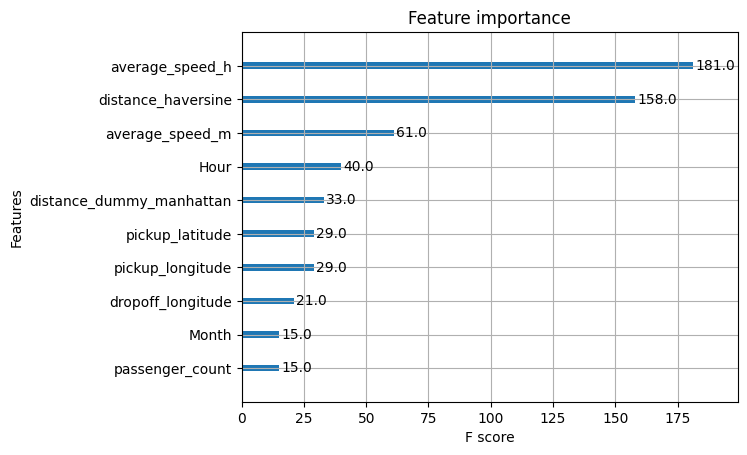

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Get the feature importance scores
importance = model.get_score(importance_type='weight')

# Convert to a sorted list
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)
print("Feature importance (by weight):")
for feature, score in sorted_importance:
    print(f"{feature}: {score}")

# Plot the feature importance
xgb.plot_importance(model, importance_type='weight', max_num_features=10)  # top 10 features
plt.show()


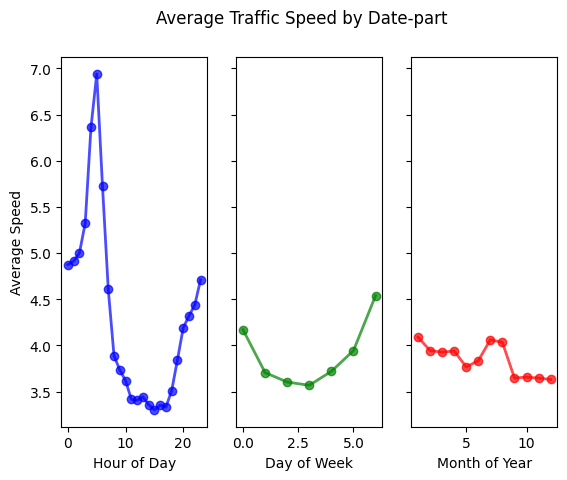

In [ ]:
fig, ax = plt.subplots(ncols=3, sharey=True)
ax[0].plot(train.groupby('Hour').mean()['avg_speed_h'], 'bo-', lw=2, alpha=0.7)
ax[1].plot(train.groupby('dayofweek').mean()['avg_speed_h'], 'go-', lw=2, alpha=0.7)
ax[2].plot(train.groupby('Month').mean()['avg_speed_h'], 'ro-', lw=2, alpha=0.7)
ax[0].set_xlabel('Hour of Day')
ax[1].set_xlabel('Day of Week')
ax[2].set_xlabel('Month of Year')
ax[0].set_ylabel('Average Speed')
fig.suptitle('Average Traffic Speed by Date-part')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize Linear Regression Model
lr_model_unique = LinearRegression()

# Train the model
lr_model_unique.fit(X_train, Y_train)

# Make predictions
y_predicted_lr = lr_model_unique.predict(X_test)

# Calculate metrics
r2_unique = r2_score(Y_test, y_predicted_lr)
rmse_unique = np.sqrt(mean_squared_error(Y_test, y_predicted_lr))
mae_unique = mean_absolute_error(Y_test, y_predicted_lr)

# Print results
print(f"Linear Regression Results:")
print(f"R-squared (R²): {r2_unique:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_unique:.4f}")
print(f"Mean Absolute Error (MAE): {mae_unique:.4f}")


Linear Regression Results:
R-squared (R²): 0.4914
Root Mean Squared Error (RMSE): 0.5814
Mean Absolute Error (MAE): 0.4065


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize Decision Tree Regressor
dt_model_unique = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model_unique.fit(X_train, Y_train)

# Make predictions
y_predicted_dt = dt_model_unique.predict(X_test)

# Calculate metrics
r2_dt = r2_score(Y_test, y_predicted_dt)
rmse_dt = np.sqrt(mean_squared_error(Y_test, y_predicted_dt))
mae_dt = mean_absolute_error(Y_test, y_predicted_dt)

# Print results
print(f"Decision Tree Regressor Results:")
print(f"R-squared (R²): {r2_dt:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_dt:.4f}")
print(f"Mean Absolute Error (MAE): {mae_dt:.4f}")


Decision Tree Regressor Results:
R-squared (R²): 0.6399
Root Mean Squared Error (RMSE): 0.4892
Mean Absolute Error (MAE): 0.2281


In [ ]:
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize LightGBM Regressor
lgb_model_unique = lgb.LGBMRegressor(random_state=42, n_estimators=100, learning_rate=0.1)

# Train the model
lgb_model_unique.fit(X_train, Y_train)

# Make predictions
y_predicted_lgb = lgb_model_unique.predict(X_test)

# Calculate metrics
r2_lgb = r2_score(Y_test, y_predicted_lgb)
rmse_lgb = np.sqrt(mean_squared_error(Y_test, y_predicted_lgb))
mae_lgb = mean_absolute_error(Y_test, y_predicted_lgb)

# Print results
print(f"LightGBM Regressor Results:")
print(f"R-squared (R²): {r2_lgb:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lgb:.4f}")
print(f"Mean Absolute Error (MAE): {mae_lgb:.4f}")


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033865 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1998
[LightGBM] [Info] Number of data points in the train set: 4218356, number of used features: 14
[LightGBM] [Info] Start training from score 6.573153
LightGBM Regressor Results:
R-squared (R²): 0.8345
Root Mean Squared Error (RMSE): 0.3316
Mean Absolute Error (MAE): 0.1466


In [ ]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 11.6 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize CatBoost Regressor
catboost_model_unique = CatBoostRegressor(random_state=42, iterations=100, learning_rate=0.1, depth=6, verbose=0)

# Train the model
catboost_model_unique.fit(X_train, Y_train)

# Make predictions
y_predicted_catboost = catboost_model_unique.predict(X_test)

# Calculate metrics
r2_catboost = r2_score(Y_test, y_predicted_catboost)
rmse_catboost = np.sqrt(mean_squared_error(Y_test, y_predicted_catboost))
mae_catboost = mean_absolute_error(Y_test, y_predicted_catboost)

# Print results
print(f"CatBoost Regressor Results:")
print(f"R-squared (R²): {r2_catboost:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_catboost:.4f}")
print(f"Mean Absolute Error (MAE): {mae_catboost:.4f}")


CatBoost Regressor Results:
R-squared (R²): 0.8314
Root Mean Squared Error (RMSE): 0.3348
Mean Absolute Error (MAE): 0.1507


In [ ]:
from joblib import dump

# Save the model to a file
dump(lgb_model_unique, 'model_lgb_duration.joblib')
print("Model saved as model_lgb_duration.joblib")

Model saved as model_lgb_duration.joblib


In [ ]:
import xgboost as xgb
import numpy as np
import pandas as pd

# Prepare DMatrix
dtrain = xgb.DMatrix(X_train, label=Y_train)
dvalid = xgb.DMatrix(X_test, label=Y_test)

# Parameters
xgb_pars = {
    'min_child_weight': 1, 'eta': 0.5, 'colsample_bytree': 0.9, 'max_depth': 6,
    'subsample': 0.9, 'lambda': 1., 'nthread': -1, 'booster': 'gbtree',
    'verbosity': 0, 'eval_metric': 'rmse', 'objective': 'reg:squarederror'
}

# Training model
model = xgb.train(xgb_pars, dtrain, num_boost_round=10, evals=[(dtrain, 'train'), (dvalid, 'valid')],
                  early_stopping_rounds=2, maximize=False, verbose_eval=1)

# Predict
y_pred = model.predict(dvalid)

# Ensure Y_test is a Series or array
if isinstance(Y_test, pd.DataFrame):
    Y_test = Y_test.squeeze()  # Convert DataFrame to Series if it's a single column

# Calculate the actual errors
errors = Y_test - y_pred

# Define thresholds based on max value of Y_test
good_threshold = 0.1 * np.max(Y_test)
bad_threshold = 0.5 * np.max(Y_test)

performance_category = pd.cut(
    np.abs(errors),
    bins=[-np.inf, good_threshold, bad_threshold, np.inf],
    labels=['Good', 'Mediocre', 'Bad']
)

# Combine results into a DataFrame
results_df = pd.DataFrame({
    'Actual': Y_test,
    'Predicted': y_pred,
    'Error': errors,  # Signed errors
    'Performance': performance_category
})

# Display examples
print("Overview of good, mediocre, and bad predictions:")
print("Good Performers:")
print(results_df[results_df['Performance'] == 'Good'].head())
print("\nMediocre Performers:")
print(results_df[results_df['Performance'] == 'Mediocre'].head())
print("\nBad Performers:")
print(results_df[results_df['Performance'] == 'Bad'].head())


[0]	train-rmse:0.52323	valid-rmse:0.52376
[1]	train-rmse:0.40385	valid-rmse:0.40459
[2]	train-rmse:0.36155	valid-rmse:0.36244
[3]	train-rmse:0.34688	valid-rmse:0.34800
[4]	train-rmse:0.34218	valid-rmse:0.34343
[5]	train-rmse:0.33977	valid-rmse:0.34114
[6]	train-rmse:0.33850	valid-rmse:0.33994
[7]	train-rmse:0.33743	valid-rmse:0.33890
[8]	train-rmse:0.33670	valid-rmse:0.33828
[9]	train-rmse:0.33632	valid-rmse:0.33796
Overview of good, mediocre, and bad predictions:
Good Performers:
     Actual  Predicted     Error Performance
0  6.942157   7.049857 -0.107700        Good
1  7.095893   6.783152  0.312741        Good
2  6.924612   6.976511 -0.051898        Good
3  7.991592   7.967317  0.024275        Good
4  7.196687   7.183768  0.012919        Good

Mediocre Performers:
       Actual  Predicted     Error Performance
5    6.335054   5.145732  1.189322    Mediocre
100  1.609438   4.825334 -3.215896    Mediocre
118  2.079442   5.179064 -3.099623    Mediocre
180  6.289716   4.881103  1.408613

In [ ]:

results_df['day_of_week'] = X_test['dayofweek'].values

# Map days to Weekday/Weekend
results_df['Weekday_Weekend'] = results_df['day_of_week'].apply(lambda x: 'Weekend' if x in [5, 6] else 'Weekday')

# Calculate average error by Weekday/Weekend
accuracy_by_day = results_df.groupby('Weekday_Weekend').agg(
    Average_Error=('Error', 'mean'),
    Good_Predictions=('Performance', lambda x: (x == 'Good').sum()),
    Total_Records=('Performance', 'count')
)

# Calculate accuracy as the percentage of good predictions
accuracy_by_day['Accuracy (%)'] = (accuracy_by_day['Good_Predictions'] / accuracy_by_day['Total_Records']) * 100

print(accuracy_by_day)


                 Average_Error  Good_Predictions  Total_Records  Accuracy (%)
Weekday_Weekend                                                              
Weekday               0.167974            759379         769670     98.662933
Weekend               0.159681            280621         284920     98.491155


In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate the standard deviation of errors
errors = np.abs(Y_test - y_pred)  # Absolute errors
std_dev = np.std(errors)
print(f"Standard Deviation of Errors: {std_dev}")


Mean Absolute Error (MAE): 0.16573324006949444
Mean Squared Error (MSE): 0.115153040951458
Root Mean Squared Error (RMSE): 0.3393420707066219
Standard Deviation of Errors: 0.2961174329341734


In [ ]:
import pandas as pd

# Calculate the actual errors
actual_errors = Y_test - y_pred

# Create a DataFrame to view actual values, predicted values, and actual errors
error_df = pd.DataFrame({
    'Actual': Y_test,
    'Predicted': y_pred,
    'Actual Error': actual_errors
})

# Display the first few rows of the DataFrame
print(error_df.head())


     Actual  Predicted  Actual Error
0  6.942157   7.069305     -0.127148
1  7.095893   6.793960      0.301934
2  6.924612   6.910118      0.014495
3  7.991592   8.043169     -0.051577
4  7.196687   7.200017     -0.003331


In [ ]:
import xgboost as xgb
import numpy as np
import pandas as pd
import scipy.stats as stats


# Calculate the actual errors
actual_errors = Y_test - y_pred

# Perform the paired t-test
t_stat, p_value = stats.ttest_rel(Y_test, y_pred)

# Print the t-test results
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 2.118757371657352, P-value: 0.03411121014130567


In [ ]:
print("Columns in X_test:", X_test.columns)


Columns in X_test: Index(['passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'distance_haversine',
       'distance_dummy_manhattan', 'direction', 'Month', 'DayofMonth', 'Hour',
       'dayofweek', 'average_speed_h', 'average_speed_m'],
      dtype='object')


In [ ]:
from scipy.stats import ttest_ind
import xgboost as xgb
import numpy as np
import pandas as pd

# Prepare DMatrix
dtrain = xgb.DMatrix(X_train, label=Y_train)
dvalid = xgb.DMatrix(X_test, label=Y_test)

# Parameters
xgb_pars = {
    'min_child_weight': 1, 'eta': 0.5, 'colsample_bytree': 0.9, 'max_depth': 6,
    'subsample': 0.9, 'lambda': 1., 'nthread': -1, 'booster': 'gbtree',
    'verbosity': 0, 'eval_metric': 'rmse', 'objective': 'reg:squarederror'
}

# Train the model
model = xgb.train(xgb_pars, dtrain, num_boost_round=10, evals=[(dtrain, 'train'), (dvalid, 'valid')],
                  early_stopping_rounds=2, maximize=False, verbose_eval=1)

# Predict
y_pred = model.predict(dvalid)

# Ensure Y_test is a Series or array
if isinstance(Y_test, pd.DataFrame):
    Y_test = Y_test.squeeze()

# Calculate actual errors (signed errors)
errors = Y_test - y_pred

# Add dayofweek and other features to results
results_df = pd.DataFrame({
    'Actual': Y_test,
    'Predicted': y_pred,
    'Error': errors,
    'dayofweek': X_test['dayofweek']  # Add dayofweek for grouping
})

# Define groups
weekday_errors = results_df[results_df['dayofweek'] < 5]['Error']  # Weekdays (0-4)
weekend_errors = results_df[results_df['dayofweek'] >= 5]['Error']  # Weekends (5-6)

# T-test: Weekday vs Weekend
t_stat_weekday, p_value_weekday = ttest_ind(weekday_errors, weekend_errors)

# T-tests for pairwise comparison between days of the week
daywise_results = {}
for day1 in range(7):
    for day2 in range(day1 + 1, 7):
        group1 = results_df[results_df['dayofweek'] == day1]['Error']
        group2 = results_df[results_df['dayofweek'] == day2]['Error']
        t_stat, p_value = ttest_ind(group1, group2)
        daywise_results[f"Day {day1} vs Day {day2}"] = (t_stat, p_value)

# Output results
print("T-Test Results:\n")

# Weekday vs Weekend
print(f"Weekday vs Weekend Errors: T-Stat = {t_stat_weekday:.4f}, P-Value = {p_value_weekday:.4f}\n")

# Pairwise Days
print("Pairwise T-Test Between Days:")
for comparison, (t_stat, p_value) in daywise_results.items():
    print(f"{comparison}: T-Stat = {t_stat:.4f}, P-Value = {p_value:.4f}")


[0]	train-rmse:0.52323	valid-rmse:0.52376
[1]	train-rmse:0.40385	valid-rmse:0.40459
[2]	train-rmse:0.36155	valid-rmse:0.36244
[3]	train-rmse:0.34688	valid-rmse:0.34800
[4]	train-rmse:0.34218	valid-rmse:0.34343
[5]	train-rmse:0.33977	valid-rmse:0.34114
[6]	train-rmse:0.33850	valid-rmse:0.33994
[7]	train-rmse:0.33743	valid-rmse:0.33890
[8]	train-rmse:0.33670	valid-rmse:0.33828
[9]	train-rmse:0.33632	valid-rmse:0.33796
T-Test Results:

Weekday vs Weekend Errors: T-Stat = 2.6771, P-Value = 0.0074

Pairwise T-Test Between Days:
Day 0 vs Day 1: T-Stat = -4.6518, P-Value = 0.0000
Day 0 vs Day 2: T-Stat = -9.0034, P-Value = 0.0000
Day 0 vs Day 3: T-Stat = -9.9377, P-Value = 0.0000
Day 0 vs Day 4: T-Stat = -6.0323, P-Value = 0.0000
Day 0 vs Day 5: T-Stat = -5.6810, P-Value = 0.0000
Day 0 vs Day 6: T-Stat = -3.0265, P-Value = 0.0025
Day 1 vs Day 2: T-Stat = -4.4221, P-Value = 0.0000
Day 1 vs Day 3: T-Stat = -5.3578, P-Value = 0.0000
Day 1 vs Day 4: T-Stat = -1.4135, P-Value = 0.1575
Day 1 vs Day

## **Peak hour**

In [ ]:
features = [
    'passenger_count', 'pickup_longitude', 'pickup_latitude',
    'dropoff_longitude', 'dropoff_latitude', 'distance_haversine',
    'distance_dummy_manhattan', 'direction', 'Month', 'DayofMonth', 'Hour', 'dayofweek',
    'avg_speed_h', 'avg_speed_m'
]
S
X = train[features]
y = train['peak_hour']  # Target variable


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
!pip install catboost

from catboost import CatBoostClassifier

model = CatBoostClassifier(verbose=0)
model.fit(X_train, y_train)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9999004352402355
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    513259
           1       1.00      1.00      1.00    330413

    accuracy                           1.00    843672
   macro avg       1.00      1.00      1.00    843672
weighted avg       1.00      1.00      1.00    843672



In [ ]:
from joblib import dump

# Save the model to a file
dump(model, 'model_peak.joblib')
print("Model saved as model_peak.joblib")

Model saved as model_peak.joblib


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print("R-squared (R²):", r2)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


R-squared (R²): 0.9995821126522904
Root Mean Squared Error (RMSE): 0.009978214257293647
Mean Absolute Error (MAE): 9.956475976445823e-05


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
import numpy as np

errors = y_test - y_pred
std_dev = np.std(errors)

print("Standard Deviation of Errors:", std_dev)

Standard Deviation of Errors: 0.009978166667009066
